<a href="https://colab.research.google.com/github/sudhakarmlal/EVA4/blob/master/Session15/DepthAndMaskModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount the Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import cv2
import numpy as np
import os
from glob import glob
%matplotlib inline
#!pip install git+https://github.com/arraiyopensource/kornia

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import io
from itertools import groupby
import cv2
from tqdm.auto import tqdm
from pathlib import Path
from time import time
from torchvision import datasets
from torch.utils.data import DataLoader, Dataset , random_split
from PIL import Image
from torchvision.transforms import transforms
import os
from glob import glob
import torch
import torchvision
from torch import nn
#from kornia.losses import SSIM

## Read the Extracted Images

In [0]:
BG_DIR = "/content/gdrive/My Drive/MASK1/batch_images1/bg_jpg"
FG_DIR = "/content/gdrive/My Drive/MASK1/batch_images1/fg_jpg"
MASK_DIR = "/content/gdrive/My Drive/MASK1/batch_images1/mask_black_jpg"
DP_DIR = "/content/gdrive/My Drive/MASK1/batch_images1/depth_fg_bg_jpg"
FG_BG_DIR = "/content/gdrive/My Drive/MASK1/batch_images1/fg_bg_jpg"

In [0]:
from tqdm import tqdm
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2

In [0]:
def get_img_file_names(path):
  img_file_names =[]
  for root, dirs, files in os.walk(path):
    for filename in files:
      #if img_file is not None:
      #print(filename)
      img_file_names.append(path + '/' + filename)  
  return img_file_names

In [0]:
bg_file_names = get_img_file_names(BG_DIR)
#fg_file_names =get_img_file_names(FG_DIR)
#mask_file_names =get_img_file_names(MASK_DIR)
#dp_file_names =get_img_file_names(DP_DIR)
#fg_bg_file_names =get_img_file_names(FG_BG_DIR)

In [0]:
print(len(bg_file_names))

100


In [0]:
fg_file_names =get_img_file_names(FG_DIR)

In [0]:
print(len(fg_file_names))

10


In [0]:
mask_file_names =get_img_file_names(MASK_DIR)
print(len(mask_file_names))

40000


In [0]:
dp_file_names =get_img_file_names(DP_DIR)
print(len(dp_file_names))

40000


In [0]:
fg_bg_file_names =get_img_file_names(FG_BG_DIR)

In [0]:
print(len(fg_bg_file_names))

40000


In [0]:
#print(len(bg_file_names))
#print(len(fg_file_names))

100
10


## Map the  Background,ForeGround,Mask,Depth and Fg_Bg Images

In [0]:
forground_image_names = []
bg_mask_img_names = []
bg_dp_img_names = []
bg_fg_bg_img_names = []

mask_img_names  = []
dp_img_names = []
fg_images_names = []
fg_bg_img_names = []

for i in range(len(fg_file_names)):
  fg_str = fg_file_names[i].split('/')[-1]
  fg_name = fg_str[0:fg_str.rfind('.jpg')]
  print(fg_name)
  forground_image_names.append(fg_name)

for i in range(len(forground_image_names)):
  for j in range(40):
    print(bg_file_names[j])
    bg_str = bg_file_names[j].split('_')[-1]
    print(bg_str[0:bg_str.rfind('.jpg')])
    bg_num  = bg_str[0:bg_str.rfind('.jpg')]
    search_str_mask ="bg_mask"+forground_image_names[i][6:]
    search_str_mask = search_str_mask + "_" +bg_num+"_"
    print(search_str_mask)
    search_str_depth_fg_bg ="depth_fg_bg"+forground_image_names[i][6:]
    search_str_depth_fg_bg =search_str_depth_fg_bg + "_" +bg_num +"_"
    print(search_str_depth_fg_bg)

    search_str_fg_bg ="fg_bg"+forground_image_names[i][6:]
    search_str_fg_bg =search_str_fg_bg + "_" +bg_num +"_"
    print(search_str_fg_bg)
  
    for k in range(len(mask_file_names)):
      mask_str = mask_file_names[k].split('/')[-1]
      fg_depth_bg_str =dp_file_names[k].split('/')[-1]
      fg_bg_str = fg_bg_file_names[k].split('/')[-1]
      if mask_str.startswith(search_str_mask):
        mask_img_names.append(mask_file_names[k])
        bg_mask_img_names.append(bg_file_names[j])
      if fg_bg_str.startswith(search_str_fg_bg):
        fg_bg_img_names.append(fg_bg_file_names[k])
        bg_fg_bg_img_names.append(bg_file_names[j])
        #fg_images_names.append(fg_file_names[i])  
      if fg_depth_bg_str.startswith(search_str_depth_fg_bg):
        dp_img_names.append(dp_file_names[k])
        bg_dp_img_names.append(bg_file_names[j])
        fg_images_names.append(fg_file_names[i]) 

  #fg_name = fg_str[0:fg_str.rfind('.jpg')]
print(len(fg_images_names))
print(len(dp_img_names))
print(len(mask_img_names))
print(len(bg_mask_img_names))
print(len(bg_dp_img_names))
print(len(fg_bg_img_names))
print(len(bg_fg_bg_img_names))

print(bg_mask_img_names[3084])
print(bg_dp_img_names[3084])  
print(bg_fg_bg_img_names[3084])
print(fg_images_names[3084])
print(mask_img_names[3084])
print(dp_img_names[3084])
print(fg_bg_img_names[3084])

fg_img_6
fg_img_3
fg_img_8
fg_img_2
fg_img_9
fg_img_1
fg_img_7
fg_img_5
fg_img_4
fg_img_10
/content/gdrive/My Drive/MASK1/batch_images1/bg_jpg/bg_img_85.jpg
85
bg_mask_6_85_
depth_fg_bg_6_85_
fg_bg_6_85_
/content/gdrive/My Drive/MASK1/batch_images1/bg_jpg/bg_img_29.jpg
29
bg_mask_6_29_
depth_fg_bg_6_29_
fg_bg_6_29_
/content/gdrive/My Drive/MASK1/batch_images1/bg_jpg/bg_img_46.jpg
46
bg_mask_6_46_
depth_fg_bg_6_46_
fg_bg_6_46_
/content/gdrive/My Drive/MASK1/batch_images1/bg_jpg/bg_img_79.jpg
79
bg_mask_6_79_
depth_fg_bg_6_79_
fg_bg_6_79_
/content/gdrive/My Drive/MASK1/batch_images1/bg_jpg/bg_img_16.jpg
16
bg_mask_6_16_
depth_fg_bg_6_16_
fg_bg_6_16_
/content/gdrive/My Drive/MASK1/batch_images1/bg_jpg/bg_img_3.jpg
3
bg_mask_6_3_
depth_fg_bg_6_3_
fg_bg_6_3_
/content/gdrive/My Drive/MASK1/batch_images1/bg_jpg/bg_img_27.jpg
27
bg_mask_6_27_
depth_fg_bg_6_27_
fg_bg_6_27_
/content/gdrive/My Drive/MASK1/batch_images1/bg_jpg/bg_img_69.jpg
69
bg_mask_6_69_
depth_fg_bg_6_69_
fg_bg_6_69_
/content/g

## Create the Master DataSet to load it to the TrainLoader

In [0]:
class MasterDataset(Dataset):
  def __init__(self,  transform= None, bg_files= None, fg_bg_files= None, ms_bg_files= None, dp_files= None):
    self.bg_files= bg_files
    self.fg_bg_files= fg_bg_files
    self.ms_bg_files= ms_bg_files
    self.dp_files= dp_files  
    self.transform = transform  

  def __len__(self):
    return len(self.bg_files)

  def __getitem__(self,index):
    bg_image = Image.open(self.bg_files[index])
    fg_bg_image = Image.open(self.fg_bg_files[index])
    ms_bg_image = Image.open(self.ms_bg_files[index])
    dp_image = Image.open(self.dp_files[index])
    if self.transform:
      bg_image = self.transform(bg_image)
      fg_bg_image = self.transform(fg_bg_image)
      ms_bg_image = self.transform(ms_bg_image)
      dp_image = self.transform(dp_image)
    return {'bg_image' : bg_image,'fg_bg_image' : fg_bg_image,'ms_bg_image' : ms_bg_image, 'dp_image' : dp_image }

## Define the transformer

In [0]:
mean, std = torch.tensor([0.485,0.456,0.406])*255, torch.tensor([0.229,0.224,0.225])*255
train_transform = transforms.Compose([
                  transforms.Resize((64,64)),
                  transforms.Grayscale(num_output_channels=3),
                  transforms.ToTensor()
])

## Create the training DataSet

In [0]:
#train_ds = MasterDataset(train_transform, bg_files, fg_bg_files, ms_bg_files,dp_files)

train_ds = MasterDataset(train_transform, bg_dp_img_names, fg_bg_img_names, mask_img_names,dp_img_names)
#[(k, v.shape) for k,v in train_ds[1].items()]

In [0]:
print(len(train_ds.bg_files))
print(len(train_ds.ms_bg_files))
print(len(train_ds.fg_bg_files))
print(len(train_ds.dp_files))

16000
16000
16000
16000


## Load data into TrainDataLoader

In [0]:
train_dl = DataLoader(train_ds, batch_size=16, shuffle = True, pin_memory=True)
sample = next( iter(train_dl))
type(sample)
[(k, v.shape) for k,v in sample.items()]

[('bg_image', torch.Size([16, 3, 64, 64])),
 ('fg_bg_image', torch.Size([16, 3, 64, 64])),
 ('ms_bg_image', torch.Size([16, 3, 64, 64])),
 ('dp_image', torch.Size([16, 3, 64, 64]))]

## Define the Model

In [0]:
import torch
import torchvision
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.input_layer = nn.Sequential(
            nn.Conv2d(in_channels=6, out_channels=64, kernel_size=(3, 3), padding=(1, 1), stride=(1, 1), bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), padding=(1, 1), stride=(1, 1), bias=False),
            # nn.MaxPool2d(2, 2),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.resblock1 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), padding=(1, 1), stride=(1, 1), bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), padding=(1, 1), stride=(1, 1), bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3, 3), padding=(1, 1), stride=(1, 1), bias=False),
            # nn.MaxPool2d(2, 2),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), padding=(1, 1), stride=(1, 1), bias=False),
            # nn.MaxPool2d(2, 2),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        self.resblock2 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), padding=(1, 1), stride=(1, 1), bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), padding=(1, 1), stride=(1, 1), bias=False),
            nn.BatchNorm2d(256)
        )

        self.layer4 = nn.Sequential(
            nn.Conv2d(256, 3, 3, stride=1, padding=1, bias=False)
        )

        self.layer5 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3, 3), padding=(1, 1), stride=(1, 1), bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU(),
        )

        self.layer6 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=(1, 1), stride=(1, 1), bias=False,
                      groups=32),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(1, 1), padding=(0, 0), stride=(1, 1), bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(),
        )

        self.layer7 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), padding=(1, 1), stride=(1, 1), bias=False),
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=(1, 1), padding=(0, 0), stride=(1, 1), bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(),
        )

        self.layer8 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), padding=(1, 1), stride=(1, 1), bias=False),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(1, 1), padding=(0, 0), stride=(1, 1), bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(),
        )

        self.layer9 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=256, kernel_size=(3, 3), padding=(1, 1), stride=(1, 1), bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(),
        )
        self.layer10 = nn.Sequential(
            nn.Conv2d(256, 3, 3, padding=(1, 1), stride=(1, 1), bias=False)
        )

    def forward(self, x):
        bg_image = x["bg_image"]
        fg_bg_image = x["fg_bg_image"]
        x = torch.cat([bg_image, fg_bg_image], dim=1)
        x = self.input_layer(x)
        x = self.layer1(x)
        r1 = self.resblock1(x)
        x = x + r1
        x = self.layer2(x)
        x = self.layer3(x)
        r2 = self.resblock2(x)
        x = x + r2
        x = self.layer4(x)
        # print(x.shape)

        y1 = self.layer5(bg_image)
        y1 = self.layer6(y1)
        y2 = self.layer5(fg_bg_image)
        y2 = self.layer6(y2)
        y = torch.cat([y1, y2], dim=1)
        y = self.layer7(y)
        y = self.layer8(y)
        y = self.layer9(y)
        y = self.layer10(y)
        return y, x

In [0]:
from torchsummary import summary
model= Net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model= model.to(device)
print(sum(p.numel() for p in model.parameters() if p.requires_grad))
from torchsummary import summary

6987744


In [0]:
!pip install git+https://github.com/arraiyopensource/kornia

  Cloning https://github.com/arraiyopensource/kornia to /tmp/pip-req-build-bzyql797
  Running command git clone -q https://github.com/arraiyopensource/kornia /tmp/pip-req-build-bzyql797
  Created wheel for kornia: filename=kornia-0.3.2+df93618-py2.py3-none-any.whl size=174640 sha256=50ad2585b9eb9ec69da869dbd91e0e8f55ee88d0c5d827747115566b67b88791
  Stored in directory: /tmp/pip-ephem-wheel-cache-wfozoqek/wheels/a0/47/86/854e2f9a801b368f296cb25f167cbd56aa805f974b15421a67
Successfully built kornia


## Define the Loss Criterion

In [0]:
from torch.optim.lr_scheduler import StepLR
from kornia.losses import SSIM
criterion1 = nn.BCEWithLogitsLoss()
criterion2 = SSIM(3, reduction="mean" )
optim = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.9, weight_decay = 1e-5)
scheduler= StepLR(optim, step_size=1, gamma= 0.01)

## Define the TensorBoard Profiler

In [0]:
#PATH= './saved_models/'
#model.load_state_dict(torch.load(PATH + '0.pth'))
PATH= Path('./gdrive/My Drive/MASK1/S15/saved_models/latest')
PATH.mkdir(exist_ok= True)

import time as t
import math
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('./gdrive/My Drive/MASK1/S15/summary')

## Save Image

In [0]:
IMG_DIR = "./gdrive/My Drive/MASK1/S15/out_images3"
def saveimage(tensors, name, figsize=(50,50), *args, **kwargs):
  filename= IMG_DIR+ name
  try:
    tensors = tensors.detach().cpu()
  except: 
    pass
  grid_tensor1= torchvision.utils.make_grid(tensors,*args, **kwargs)
  grid_image1= grid_tensor1.permute(1,2,0)
  plt.figure(figsize=figsize)
  plt.imshow(grid_image1)
  plt.xticks([])
  plt.yticks([])
  plt.savefig(filename, bbox_inches = 'tight')
  plt.show()

## Train Model

In [0]:
def train( batch, model,scheduler, criterion1,criterion2, device, train_loader, optimizer, epoch,iteration,writer):
  other_time = 0
  correct = 0
  start = time()
  other_s = time()
  model.train()
  other_e = time()
  other_time += other_e - other_s
  data_load_time = 0
  model_time = 0
  meow_time = 0
  pbar = tqdm(train_loader)
  for batch_idx, data in enumerate(pbar):
    other_s = time()
    optimizer.zero_grad()
    other_e = time()
    other_time += other_e - other_s
    load_s = time()
    data["bg_image"] = data["bg_image"].to(device)
    data["fg_bg_image"] = data["fg_bg_image"].to(device)
    data["ms_bg_image"] = data["ms_bg_image"].to(device)
    data["dp_image"] = data["dp_image"].to(device)
    load_e = time()
    data_load_time += load_e - load_s
    model_s = time() 
    optimizer.zero_grad()
    output=model(data)    
    #loss= criterion(output,data["ms_bg_image"])
    #loss1 = criterion(output[0],data["ms_bg_image"])
    #loss2 = criterion(output[1],data["dp_image"])
    loss1 = criterion1(output[0],data["ms_bg_image"])
    loss2 = criterion2(output[1],data["dp_image"])
    loss = 2*loss1 + loss2
    pbar.set_description(desc= f'l1={round(loss1.item(),4)} l2={round(loss2.item(),4)}')
    loss.backward()
    optimizer.step()
    model_e = time()
    model_time += model_e - model_s
    other_s = time()
    if batch_idx % 250 == 0:
      writer.add_scalar('training loss', loss.item() / 1000, epoch * iteration + batch_idx)
    if batch_idx % 10 == 0:
      torch.cuda.empty_cache()
    if batch_idx % 50 == 0:
      print('Train Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch,batch_idx*len(data),len(train_loader.dataset), 
                                                                    100.*batch_idx/len(train_loader), loss.item()))
    if epoch == 4:
      if batch_idx % iteration == 0:
        saveimage(data["fg_bg_image"], f"/{batch}_3CFGBGORG.jpg")
        saveimage(output[0], f"/{batch}_3CMSBGPDCT.jpg")
        saveimage(data["ms_bg_image"], f"/{batch}_3CMSBGORG.jpg")
        saveimage(output[1], f"/{batch}_3CDPBGPDCT.jpg")      
        saveimage(data["dp_image"], f"/{batch}_3CDPBGORG.jpg")  
    other_e = time()
    other_time += other_e - other_s
  end = time()
    #if batch_idx % 5000 == 0:
    #  show_pred(output.detach().cpu,nrow=2)
    #  show(output,nrow=4)
    #if batch_idx % 50 == 0:
    #  torch.save(model.state_dict(), PATH/f"{batch_idx}.pth")  
  #if epoch == 2:
  #torch.save(model.state_dict(), PATH/f"model_fn_{epoch}.pth")  
  print(f'Total Execution time : {end-start:.2f} s')
  print(f'Model Execution Time : {model_time:.2f} s')
  print(f'Data Loading Time : {data_load_time:.2f} s')
  print(f'Other Execution Time : {other_time:.2f} s')

## Execute the Model

In [0]:
def executeModel(batch,train_dl,model, fromepoch, toepoch):
  iteration= len(train_dl)
  for epoch in range(fromepoch, toepoch):
    #modeldata = trainmodeldepth(batch, model,scheduler, criterion1,criterion2, device, train_dl, optim, epoch,iteration,writer)
    train( batch, model,scheduler, criterion1,criterion2, device, train_dl, optim, epoch,iteration,writer)
    scheduler.step()  
  torch.save(model.state_dict(), PATH/f"modelup3C_{batch}.pth")

l1=0.7487 l2=0.4938:   0%|          | 1/1000 [00:21<5:52:14, 21.16s/it]

Train Epoch : 1 [0/16000 (0%)]	Loss: 1.991237


l1=0.2123 l2=0.387:   5%|▌         | 51/1000 [09:53<2:58:33, 11.29s/it]

Train Epoch : 1 [200/16000 (5%)]	Loss: 0.811610


l1=0.2218 l2=0.2168:  10%|█         | 101/1000 [19:20<2:41:39, 10.79s/it]

Train Epoch : 1 [400/16000 (10%)]	Loss: 0.660279


l1=0.219 l2=0.1741:  15%|█▌        | 151/1000 [28:18<2:30:06, 10.61s/it]

Train Epoch : 1 [600/16000 (15%)]	Loss: 0.612051


l1=0.2265 l2=0.1723:  20%|██        | 201/1000 [37:03<2:17:14, 10.31s/it]

Train Epoch : 1 [800/16000 (20%)]	Loss: 0.625195


l1=0.2191 l2=0.1596:  25%|██▌       | 251/1000 [45:47<2:16:18, 10.92s/it]

Train Epoch : 1 [1000/16000 (25%)]	Loss: 0.597762


l1=0.2337 l2=0.146:  30%|███       | 301/1000 [55:10<2:04:12, 10.66s/it]

Train Epoch : 1 [1200/16000 (30%)]	Loss: 0.613518


l1=0.2017 l2=0.1639:  35%|███▌      | 351/1000 [1:03:47<1:52:28, 10.40s/it]

Train Epoch : 1 [1400/16000 (35%)]	Loss: 0.567414


l1=0.213 l2=0.1453:  40%|████      | 401/1000 [1:12:32<1:45:06, 10.53s/it]

Train Epoch : 1 [1600/16000 (40%)]	Loss: 0.571380


l1=0.2173 l2=0.1444:  45%|████▌     | 451/1000 [1:21:35<1:32:42, 10.13s/it]

Train Epoch : 1 [1800/16000 (45%)]	Loss: 0.579035


l1=0.2513 l2=0.1517:  50%|█████     | 501/1000 [1:30:14<1:24:20, 10.14s/it]

Train Epoch : 1 [2000/16000 (50%)]	Loss: 0.654326


l1=0.2155 l2=0.1347:  55%|█████▌    | 551/1000 [1:39:00<1:19:26, 10.62s/it]

Train Epoch : 1 [2200/16000 (55%)]	Loss: 0.565792


l1=0.2253 l2=0.135:  60%|██████    | 601/1000 [1:48:03<1:12:47, 10.95s/it]

Train Epoch : 1 [2400/16000 (60%)]	Loss: 0.585699


l1=0.2273 l2=0.1436:  65%|██████▌   | 651/1000 [1:57:10<1:04:43, 11.13s/it]

Train Epoch : 1 [2600/16000 (65%)]	Loss: 0.598193


l1=0.2117 l2=0.1201:  70%|███████   | 701/1000 [2:06:02<51:09, 10.27s/it]

Train Epoch : 1 [2800/16000 (70%)]	Loss: 0.543577


l1=0.1916 l2=0.1263:  75%|███████▌  | 751/1000 [2:14:35<44:23, 10.70s/it]

Train Epoch : 1 [3000/16000 (75%)]	Loss: 0.509426


l1=0.2132 l2=0.121:  80%|████████  | 801/1000 [2:23:46<37:59, 11.46s/it]

Train Epoch : 1 [3200/16000 (80%)]	Loss: 0.547446


l1=0.2184 l2=0.1143:  85%|████████▌ | 851/1000 [2:33:11<27:07, 10.92s/it]

Train Epoch : 1 [3400/16000 (85%)]	Loss: 0.551188


l1=0.2003 l2=0.1078:  90%|█████████ | 901/1000 [2:41:52<17:37, 10.68s/it]

Train Epoch : 1 [3600/16000 (90%)]	Loss: 0.508367


l1=0.2159 l2=0.1105:  95%|█████████▌| 951/1000 [2:50:32<08:04,  9.88s/it]

Train Epoch : 1 [3800/16000 (95%)]	Loss: 0.542174


  0%|          | 0/1000 [00:00<?, ?it/s]

Total Execution time : 10757.11 s
Model Execution Time : 64.41 s
Data Loading Time : 0.39 s
Other Execution Time : 18.96 s


l1=0.2167 l2=0.1009:   0%|          | 1/1000 [00:00<07:38,  2.18it/s]

Train Epoch : 2 [0/16000 (0%)]	Loss: 0.534346


l1=0.2118 l2=0.103:   5%|▌         | 51/1000 [00:15<05:14,  3.02it/s]

Train Epoch : 2 [200/16000 (5%)]	Loss: 0.526547


l1=0.1974 l2=0.0943:  10%|█         | 101/1000 [00:30<05:02,  2.97it/s]

Train Epoch : 2 [400/16000 (10%)]	Loss: 0.489170


l1=0.216 l2=0.1103:  15%|█▌        | 151/1000 [00:45<04:46,  2.96it/s]

Train Epoch : 2 [600/16000 (15%)]	Loss: 0.542168


l1=0.2259 l2=0.1:  20%|██        | 201/1000 [00:59<04:28,  2.98it/s]

Train Epoch : 2 [800/16000 (20%)]	Loss: 0.551887


l1=0.2224 l2=0.0952:  25%|██▌       | 251/1000 [01:14<04:10,  2.99it/s]

Train Epoch : 2 [1000/16000 (25%)]	Loss: 0.539913


l1=0.2096 l2=0.0861:  30%|███       | 301/1000 [01:29<03:54,  2.99it/s]

Train Epoch : 2 [1200/16000 (30%)]	Loss: 0.505234


l1=0.215 l2=0.1022:  35%|███▌      | 351/1000 [01:44<03:38,  2.98it/s]

Train Epoch : 2 [1400/16000 (35%)]	Loss: 0.532182


l1=0.2201 l2=0.0851:  40%|████      | 401/1000 [01:59<03:22,  2.96it/s]

Train Epoch : 2 [1600/16000 (40%)]	Loss: 0.525331


l1=0.2211 l2=0.0923:  45%|████▌     | 451/1000 [02:14<03:04,  2.98it/s]

Train Epoch : 2 [1800/16000 (45%)]	Loss: 0.534535


l1=0.2191 l2=0.096:  50%|█████     | 501/1000 [02:29<02:55,  2.85it/s]

Train Epoch : 2 [2000/16000 (50%)]	Loss: 0.534248


l1=0.2093 l2=0.0887:  55%|█████▌    | 551/1000 [02:44<02:31,  2.97it/s]

Train Epoch : 2 [2200/16000 (55%)]	Loss: 0.507224


l1=0.2239 l2=0.1013:  60%|██████    | 601/1000 [02:59<02:13,  3.00it/s]

Train Epoch : 2 [2400/16000 (60%)]	Loss: 0.549151


l1=0.2236 l2=0.0841:  65%|██████▌   | 651/1000 [03:14<01:58,  2.95it/s]

Train Epoch : 2 [2600/16000 (65%)]	Loss: 0.531255


l1=0.2074 l2=0.0956:  70%|███████   | 701/1000 [03:29<01:40,  2.98it/s]

Train Epoch : 2 [2800/16000 (70%)]	Loss: 0.510447


l1=0.2076 l2=0.0845:  75%|███████▌  | 751/1000 [03:44<01:24,  2.94it/s]

Train Epoch : 2 [3000/16000 (75%)]	Loss: 0.499727


l1=0.2261 l2=0.0912:  80%|████████  | 801/1000 [03:59<01:07,  2.96it/s]

Train Epoch : 2 [3200/16000 (80%)]	Loss: 0.543479


l1=0.2005 l2=0.1034:  85%|████████▌ | 851/1000 [04:14<00:49,  2.99it/s]

Train Epoch : 2 [3400/16000 (85%)]	Loss: 0.504443


l1=0.2107 l2=0.0985:  90%|█████████ | 901/1000 [04:29<00:33,  2.94it/s]

Train Epoch : 2 [3600/16000 (90%)]	Loss: 0.519872


l1=0.211 l2=0.097:  95%|█████████▌| 951/1000 [04:44<00:16,  2.93it/s]

Train Epoch : 2 [3800/16000 (95%)]	Loss: 0.518987


  0%|          | 0/1000 [00:00<?, ?it/s]

Total Execution time : 298.82 s
Model Execution Time : 62.79 s
Data Loading Time : 0.38 s
Other Execution Time : 18.81 s


l1=0.2225 l2=0.0961:   0%|          | 1/1000 [00:00<07:44,  2.15it/s]

Train Epoch : 3 [0/16000 (0%)]	Loss: 0.541104


l1=0.2242 l2=0.096:   5%|▌         | 51/1000 [00:15<05:19,  2.97it/s]

Train Epoch : 3 [200/16000 (5%)]	Loss: 0.544270


l1=0.2066 l2=0.0916:  10%|█         | 101/1000 [00:30<04:57,  3.02it/s]

Train Epoch : 3 [400/16000 (10%)]	Loss: 0.504861


l1=0.2045 l2=0.0913:  15%|█▌        | 151/1000 [00:44<04:43,  2.99it/s]

Train Epoch : 3 [600/16000 (15%)]	Loss: 0.500363


l1=0.2048 l2=0.088:  20%|██        | 201/1000 [00:59<04:31,  2.95it/s]

Train Epoch : 3 [800/16000 (20%)]	Loss: 0.497593


l1=0.2165 l2=0.0922:  25%|██▌       | 251/1000 [01:14<04:06,  3.03it/s]

Train Epoch : 3 [1000/16000 (25%)]	Loss: 0.525137


l1=0.204 l2=0.0948:  30%|███       | 301/1000 [01:29<03:51,  3.02it/s]

Train Epoch : 3 [1200/16000 (30%)]	Loss: 0.502857


l1=0.2162 l2=0.0941:  35%|███▌      | 351/1000 [01:44<04:24,  2.46it/s]

Train Epoch : 3 [1400/16000 (35%)]	Loss: 0.526591


l1=0.2068 l2=0.0856:  40%|████      | 401/1000 [01:59<03:18,  3.02it/s]

Train Epoch : 3 [1600/16000 (40%)]	Loss: 0.499197


l1=0.2262 l2=0.0921:  45%|████▌     | 451/1000 [02:14<03:05,  2.97it/s]

Train Epoch : 3 [1800/16000 (45%)]	Loss: 0.544631


l1=0.2036 l2=0.0976:  50%|█████     | 501/1000 [02:29<02:45,  3.01it/s]

Train Epoch : 3 [2000/16000 (50%)]	Loss: 0.504735


l1=0.2167 l2=0.0935:  55%|█████▌    | 551/1000 [02:44<02:37,  2.84it/s]

Train Epoch : 3 [2200/16000 (55%)]	Loss: 0.526922


l1=0.2142 l2=0.0939:  60%|██████    | 601/1000 [02:59<02:12,  3.01it/s]

Train Epoch : 3 [2400/16000 (60%)]	Loss: 0.522329


l1=0.2099 l2=0.0939:  65%|██████▌   | 651/1000 [03:14<01:59,  2.91it/s]

Train Epoch : 3 [2600/16000 (65%)]	Loss: 0.513770


l1=0.2309 l2=0.1081:  70%|███████   | 701/1000 [03:29<01:40,  2.97it/s]

Train Epoch : 3 [2800/16000 (70%)]	Loss: 0.569958


l1=0.2136 l2=0.0837:  75%|███████▌  | 751/1000 [03:44<01:23,  2.97it/s]

Train Epoch : 3 [3000/16000 (75%)]	Loss: 0.510903


l1=0.201 l2=0.085:  80%|████████  | 801/1000 [03:58<01:06,  3.01it/s]

Train Epoch : 3 [3200/16000 (80%)]	Loss: 0.486924


l1=0.2024 l2=0.0967:  85%|████████▌ | 851/1000 [04:13<00:49,  2.99it/s]

Train Epoch : 3 [3400/16000 (85%)]	Loss: 0.501473


l1=0.2015 l2=0.0908:  90%|█████████ | 901/1000 [04:28<00:33,  2.98it/s]

Train Epoch : 3 [3600/16000 (90%)]	Loss: 0.493797


l1=0.2128 l2=0.0929:  95%|█████████▌| 951/1000 [04:43<00:16,  2.98it/s]

Train Epoch : 3 [3800/16000 (95%)]	Loss: 0.518424


  0%|          | 0/1000 [00:00<?, ?it/s]

Total Execution time : 297.36 s
Model Execution Time : 62.72 s
Data Loading Time : 0.38 s
Other Execution Time : 18.81 s


l1=0.2144 l2=0.0992:   0%|          | 0/1000 [00:00<?, ?it/s]

Train Epoch : 4 [0/16000 (0%)]	Loss: 0.528049


FileNotFoundError: ignored

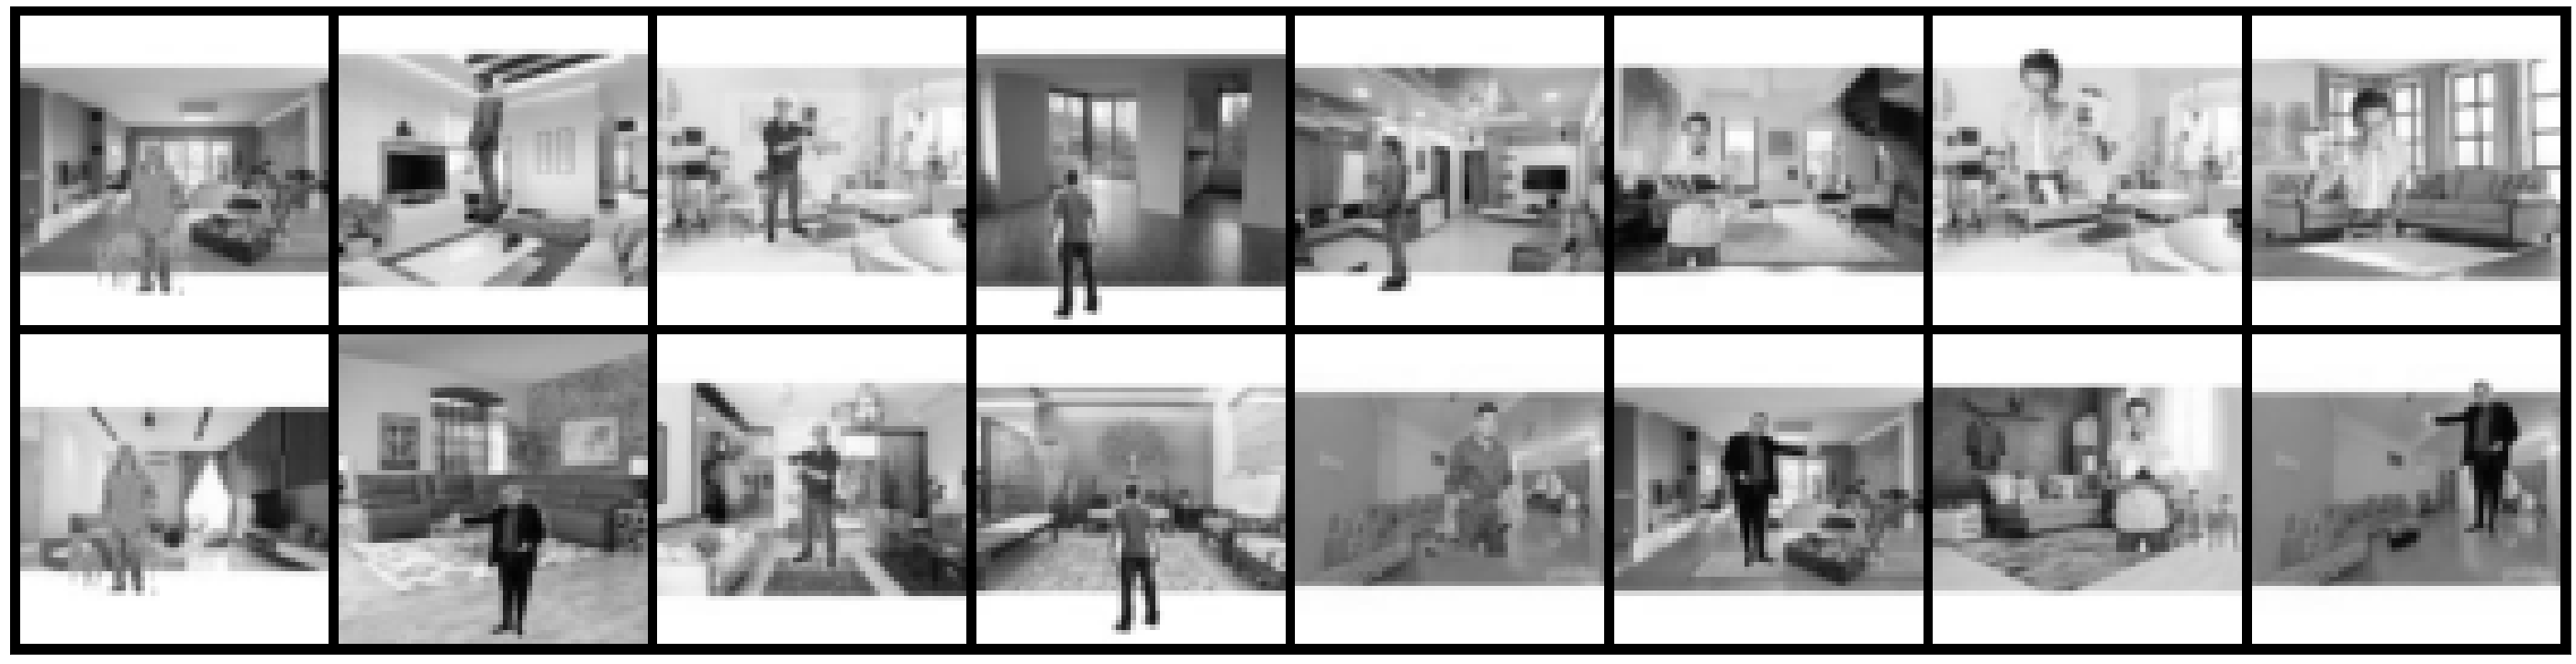

In [0]:
executeModel(batch=1,train_dl=train_dl ,model= model, fromepoch=1, toepoch=5)

In [0]:
from torch.optim.lr_scheduler import StepLR
#device = torch.device('cuda:0')
#model= model.to(device)
scheduler= StepLR(optim, step_size=1, gamma= 0.01)

In [0]:
torch.save(model.state_dict(), PATH/f"myrun.pth")

  0%|          | 0/250 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
l1=0.647 l2=0.763:   0%|          | 0/250 [00:24<?, ?it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Train Epoch : 1 [0/4000 (0%)]	Loss: 2.056946


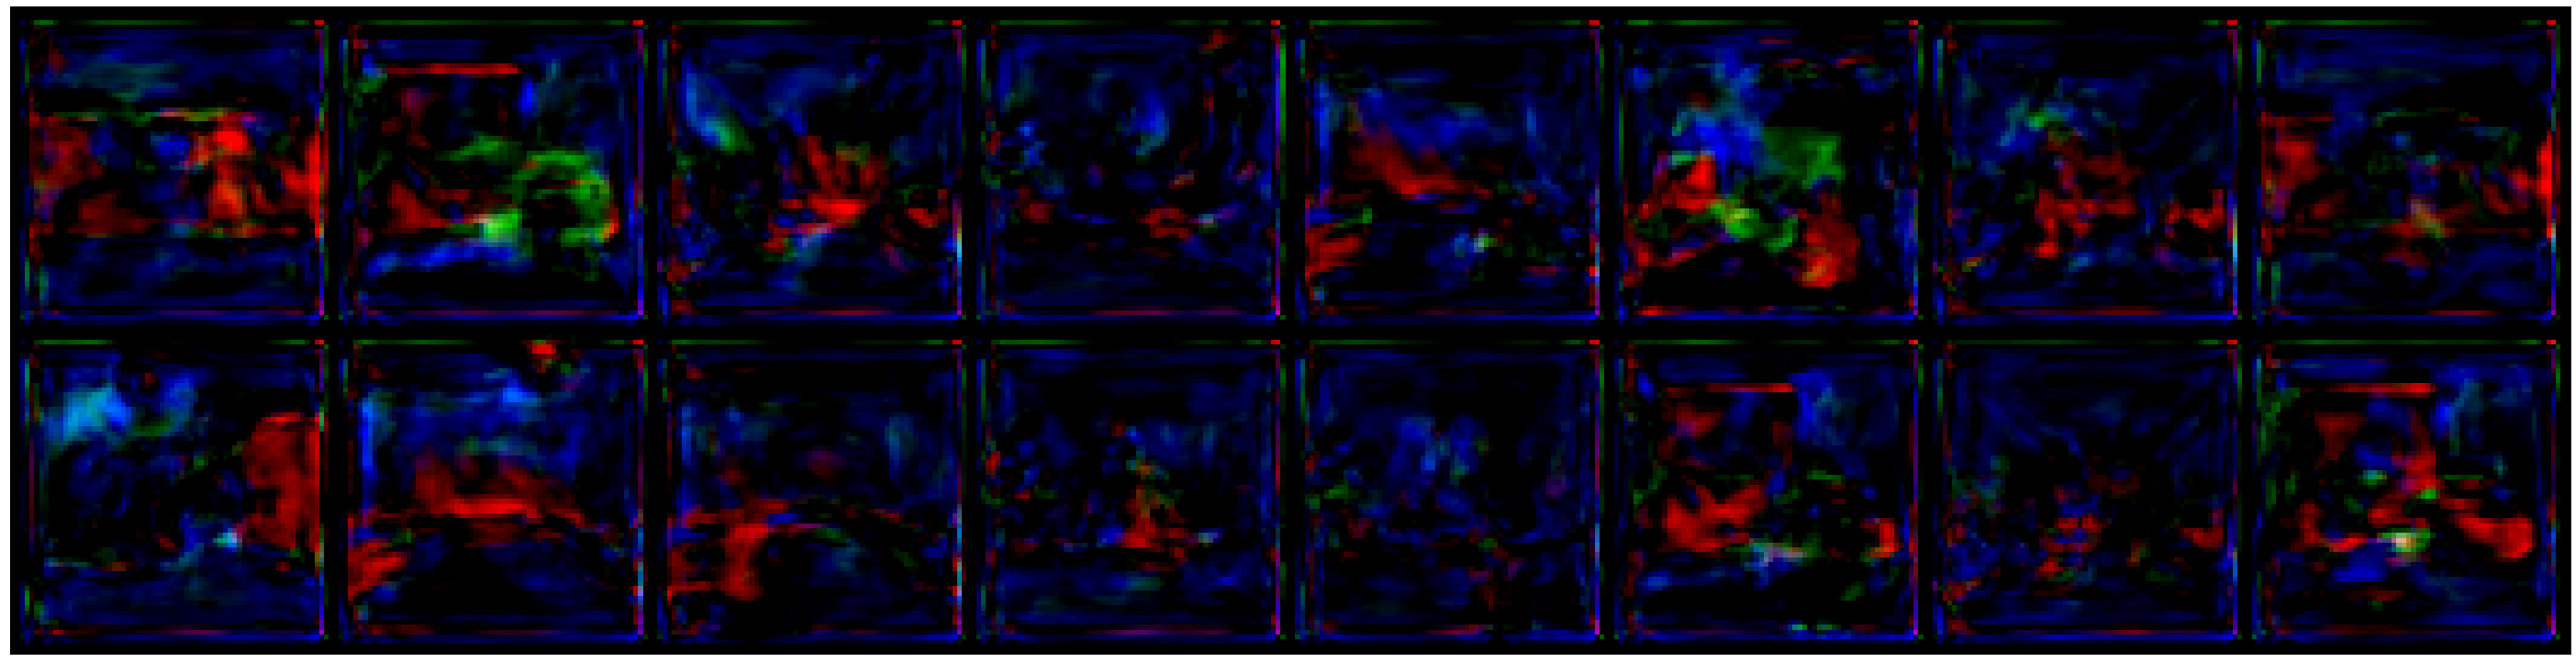

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


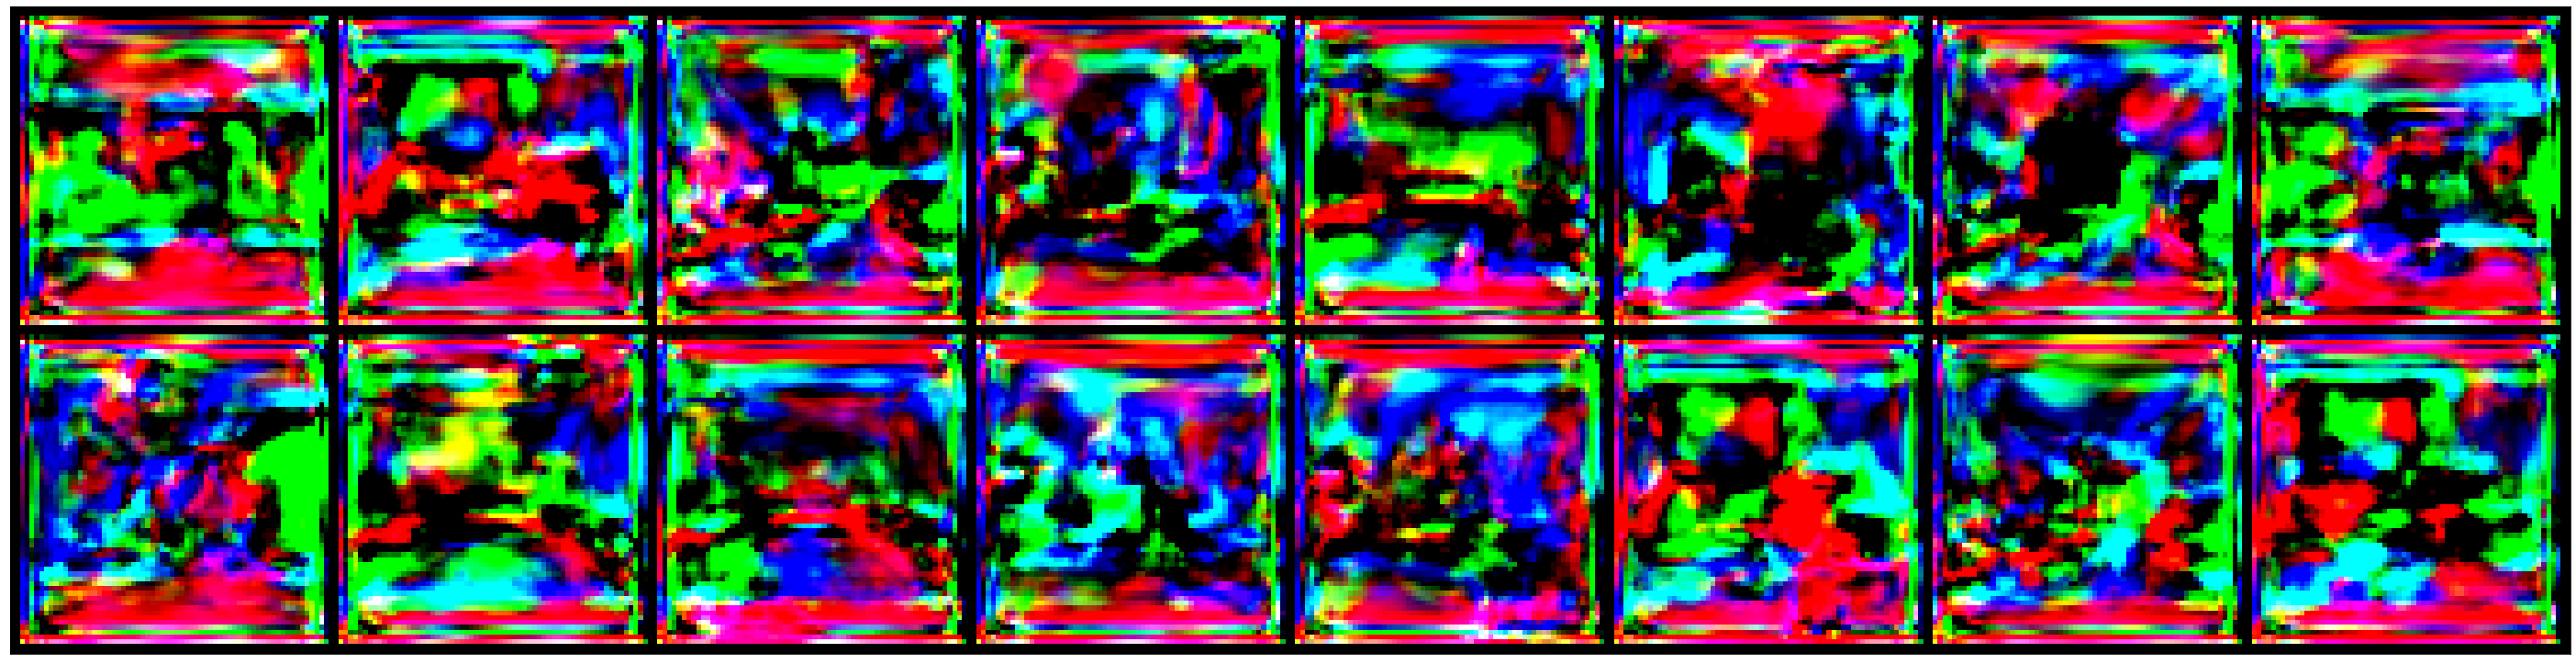

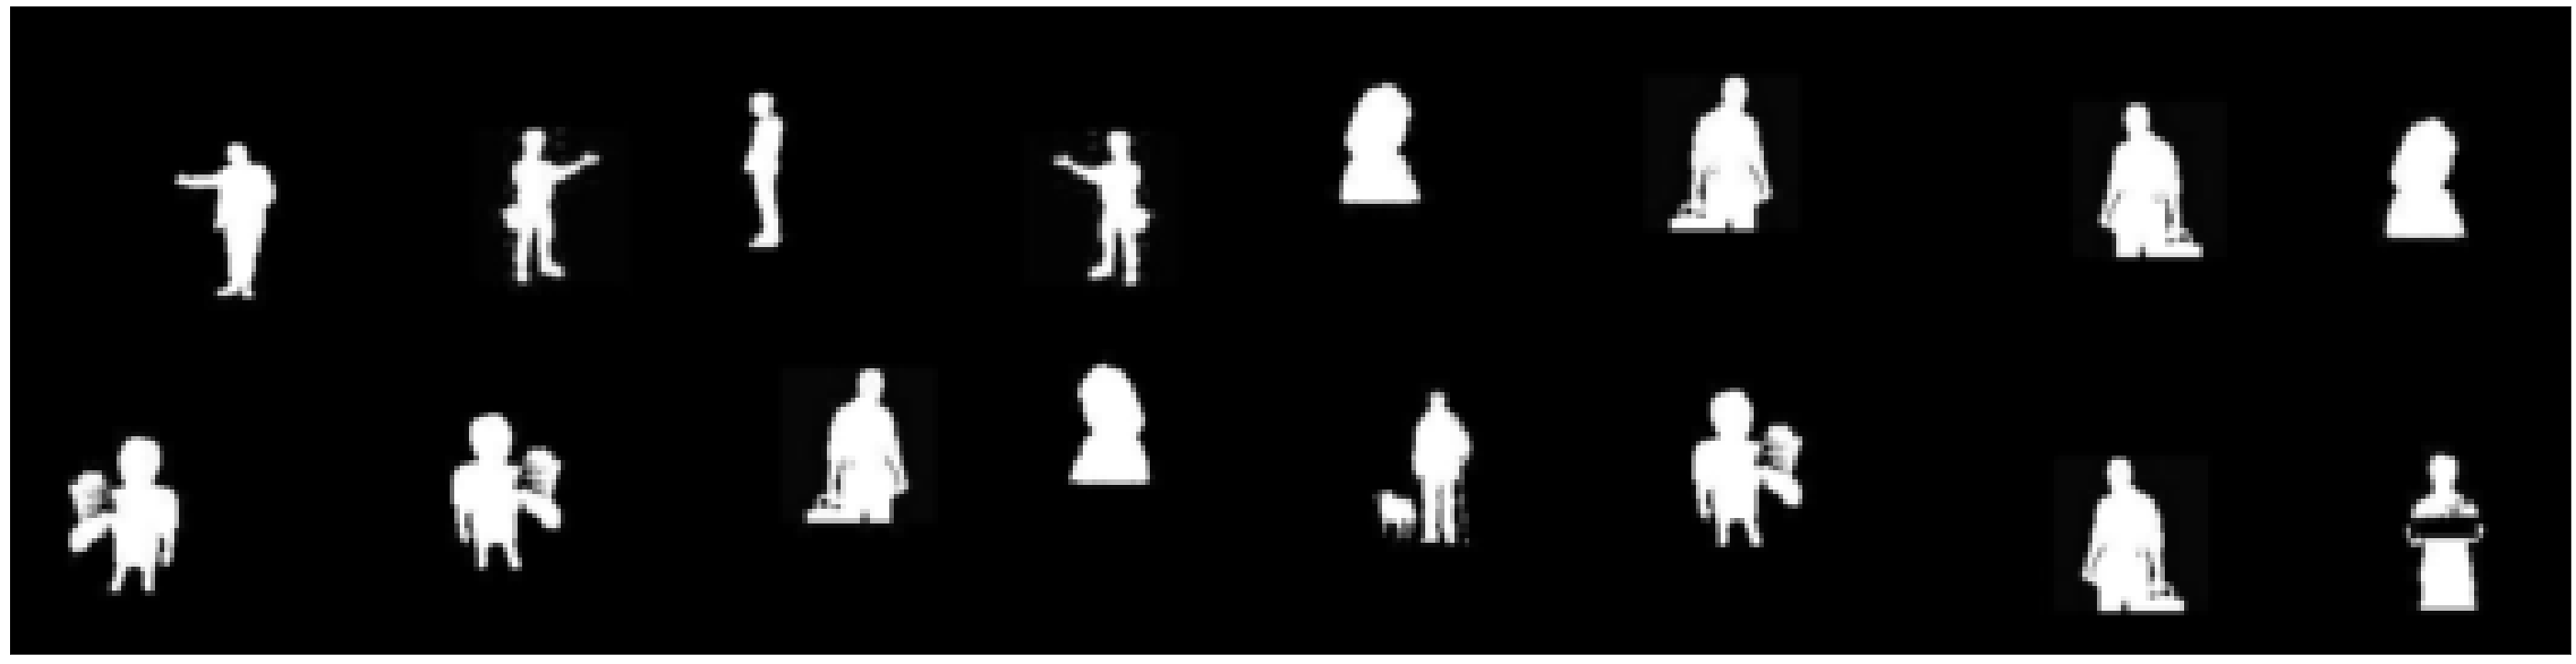

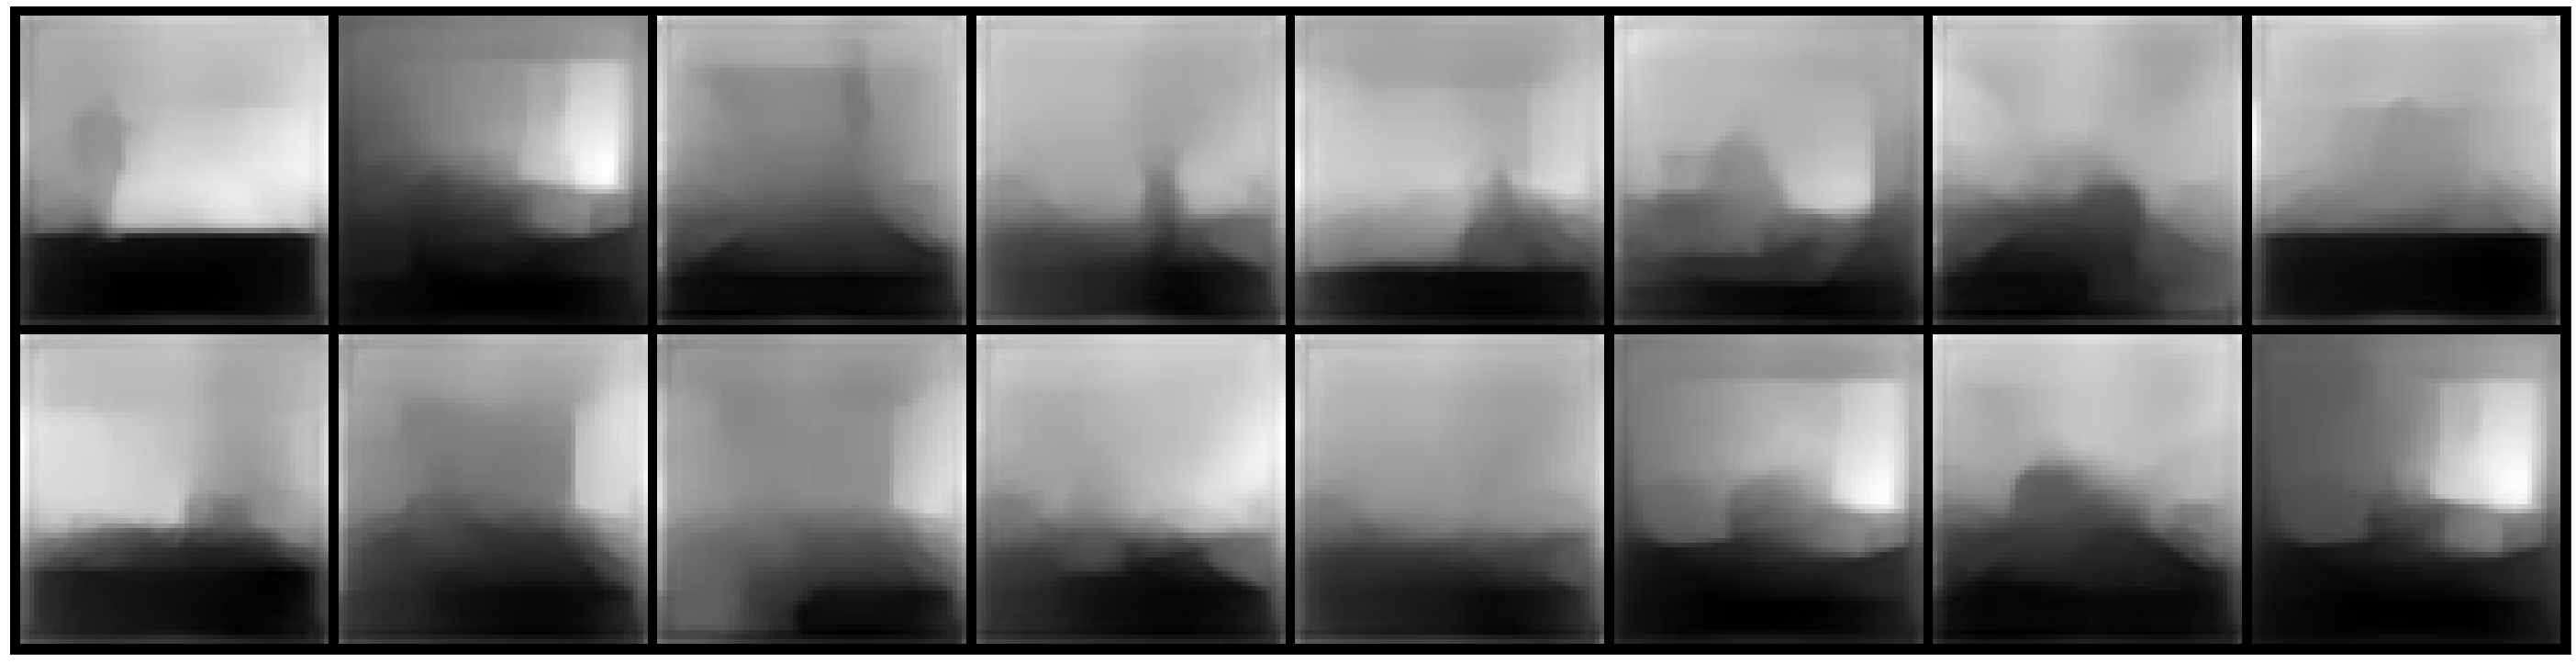

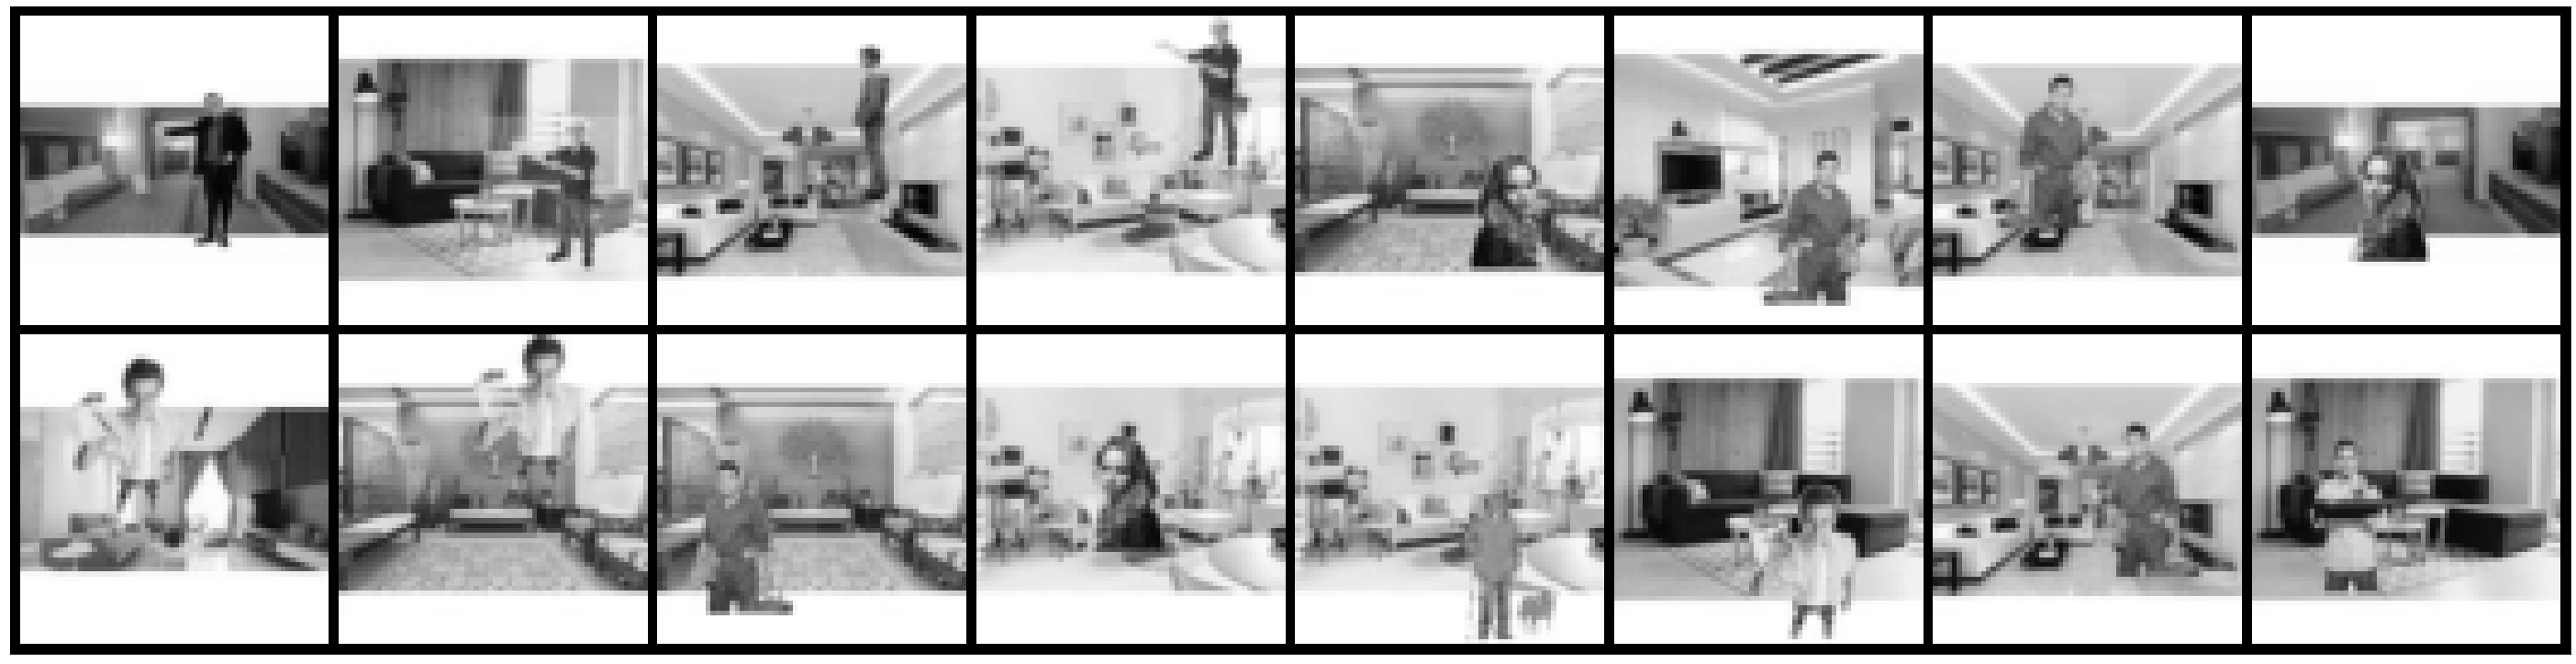

l1=0.1887 l2=0.6601:  20%|██        | 51/250 [18:57<1:12:30, 21.86s/it]

Train Epoch : 1 [200/4000 (20%)]	Loss: 1.037520


l1=0.1949 l2=0.6645:  40%|████      | 101/250 [37:25<54:42, 22.03s/it]

Train Epoch : 1 [400/4000 (40%)]	Loss: 1.054251


l1=0.1981 l2=0.6521:  60%|██████    | 151/250 [55:54<36:51, 22.34s/it]

Train Epoch : 1 [600/4000 (60%)]	Loss: 1.048354


l1=0.198 l2=0.6645:  80%|████████  | 201/250 [1:14:19<17:47, 21.78s/it]

Train Epoch : 1 [800/4000 (80%)]	Loss: 1.060401


l1=0.2068 l2=0.638:   0%|          | 0/250 [00:00<?, ?it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Train Epoch : 2 [0/4000 (0%)]	Loss: 1.051604


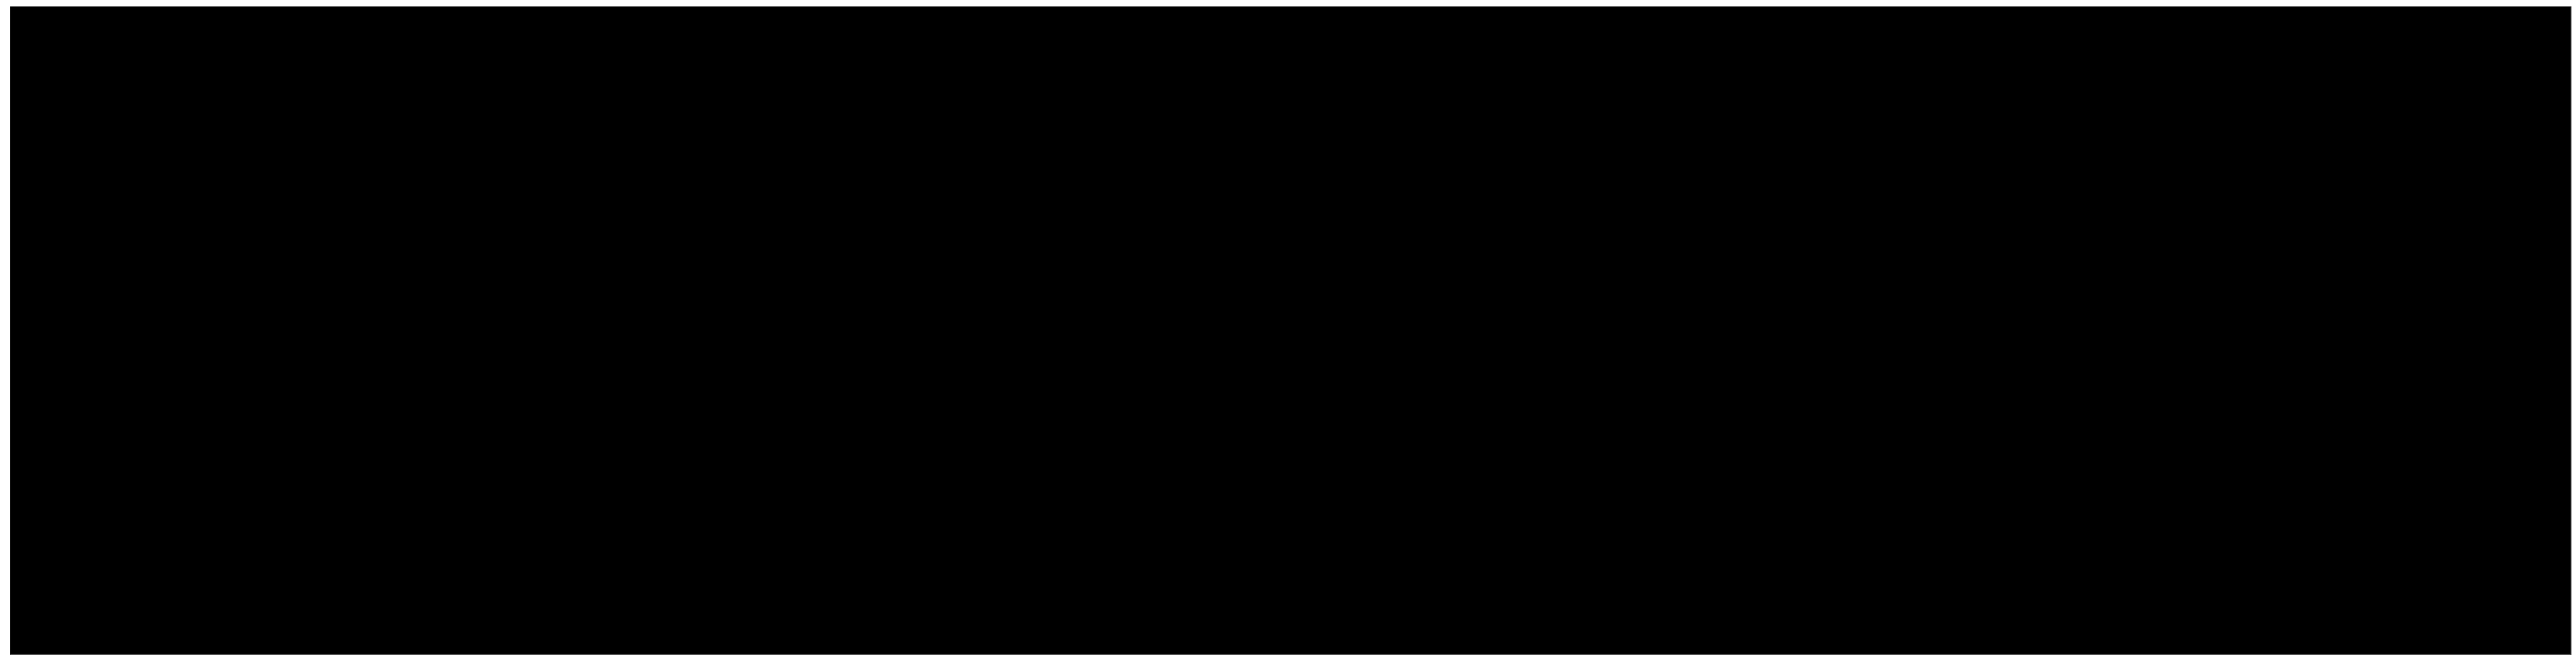

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


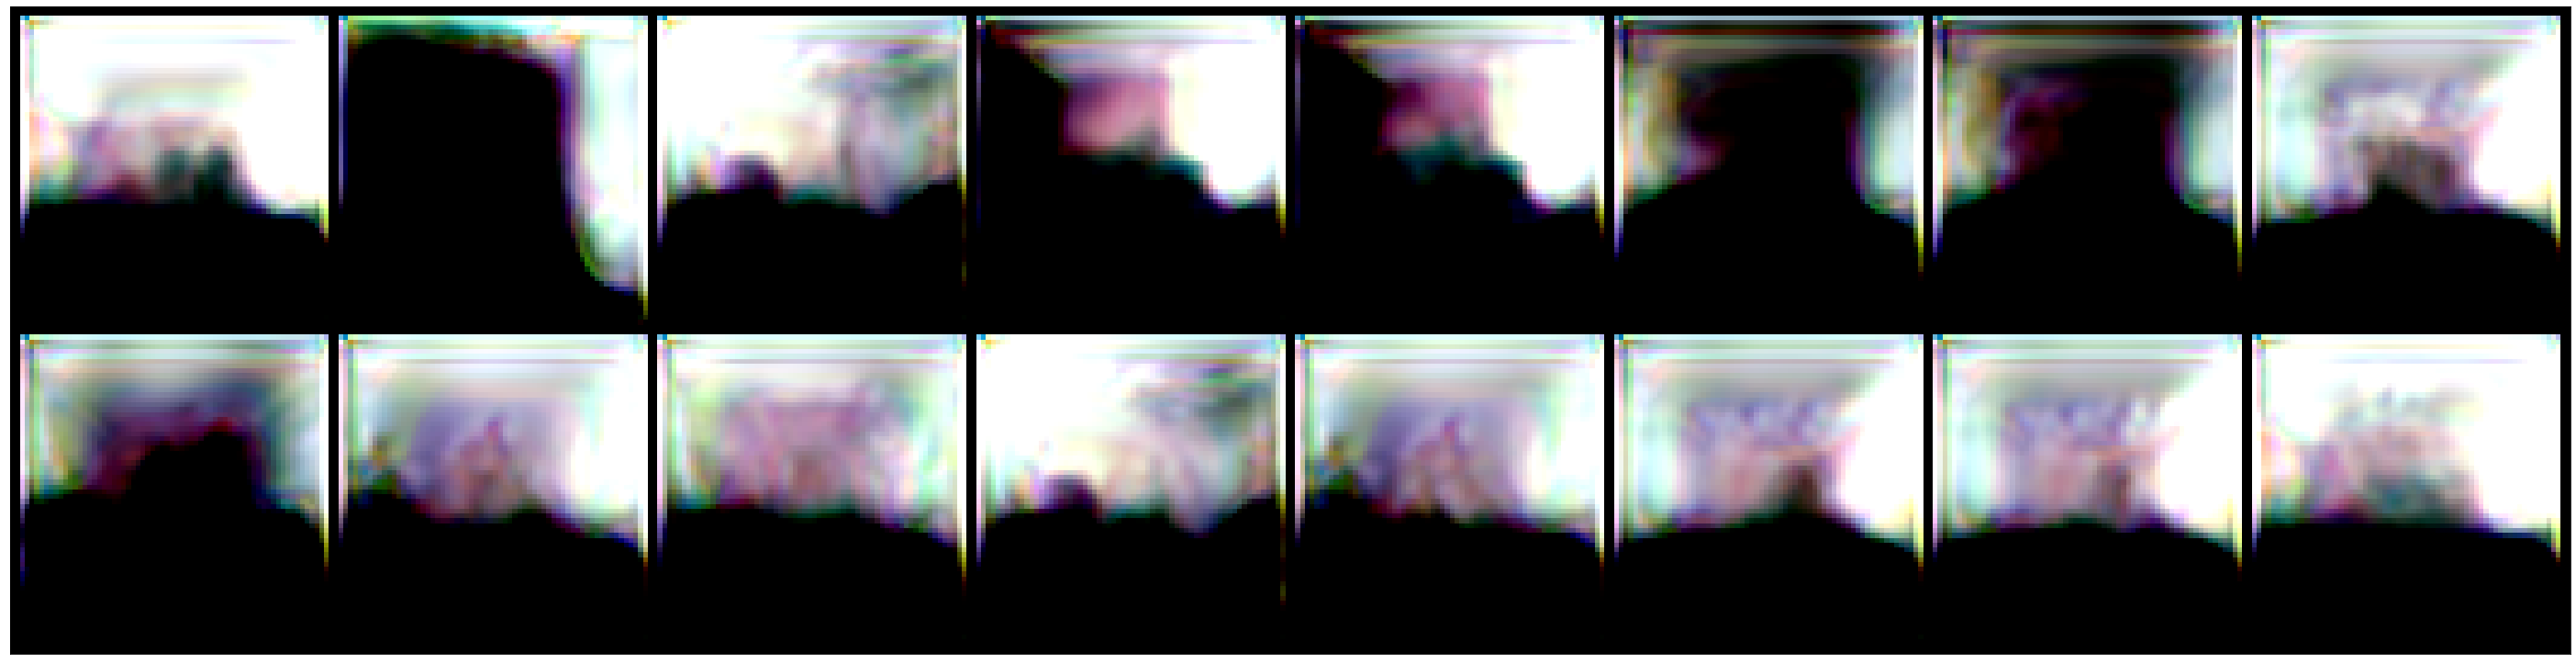

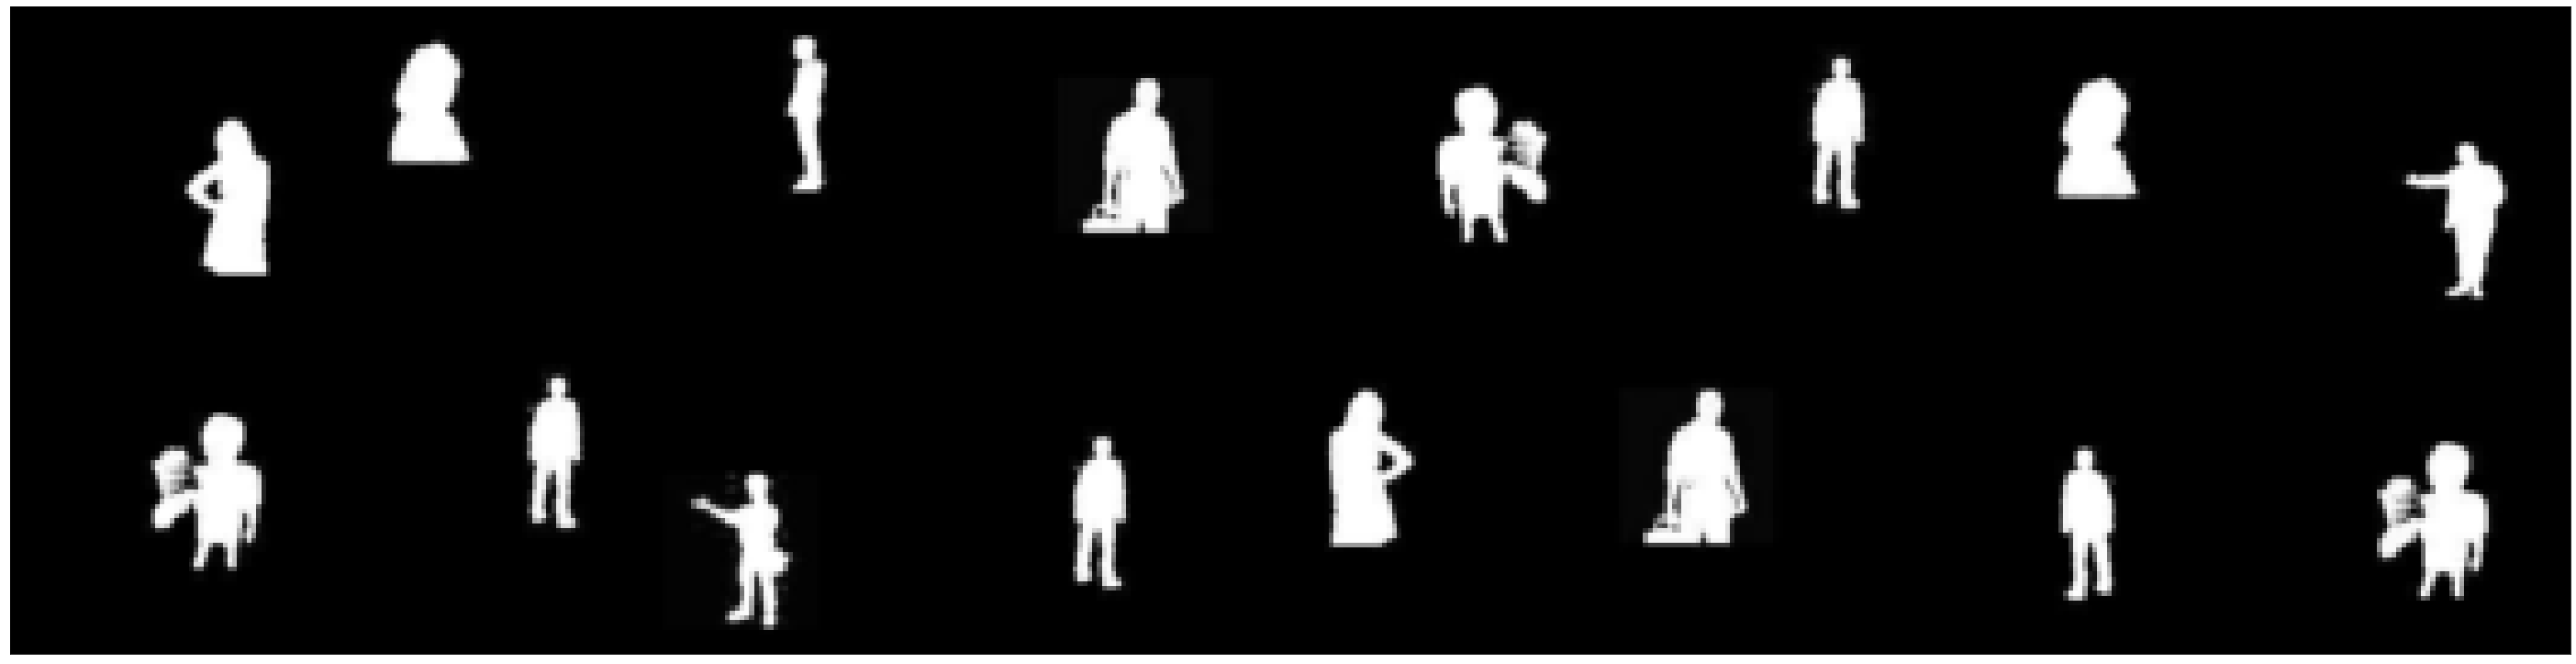

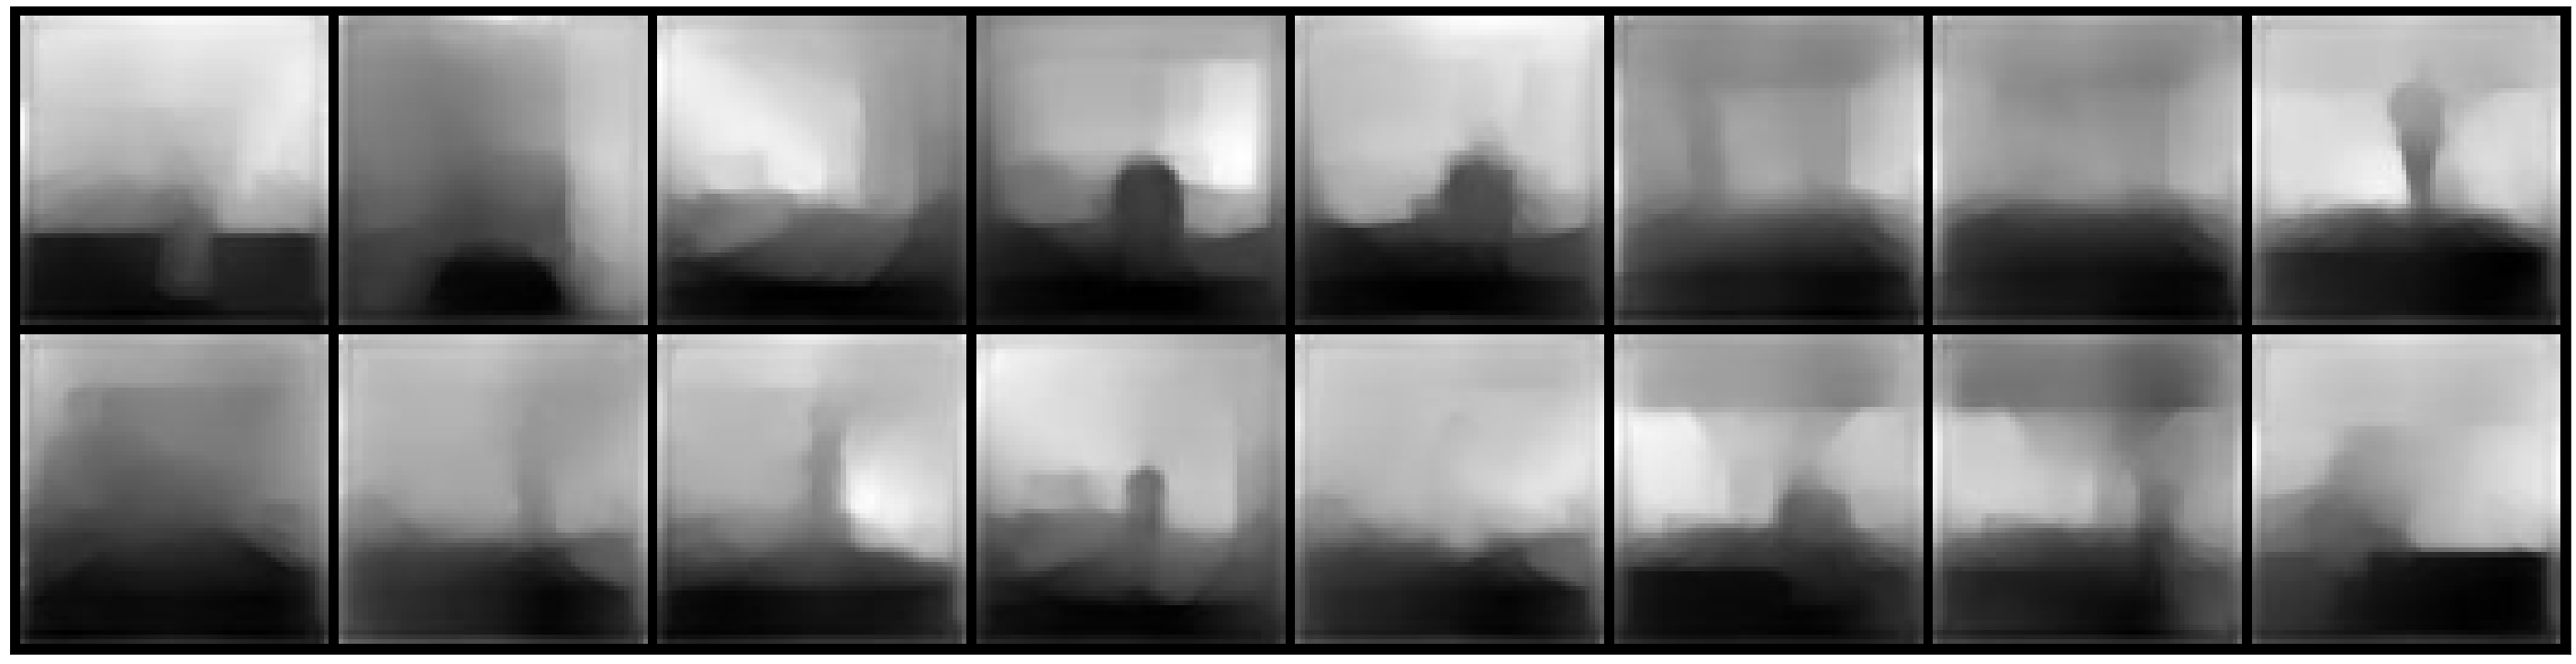

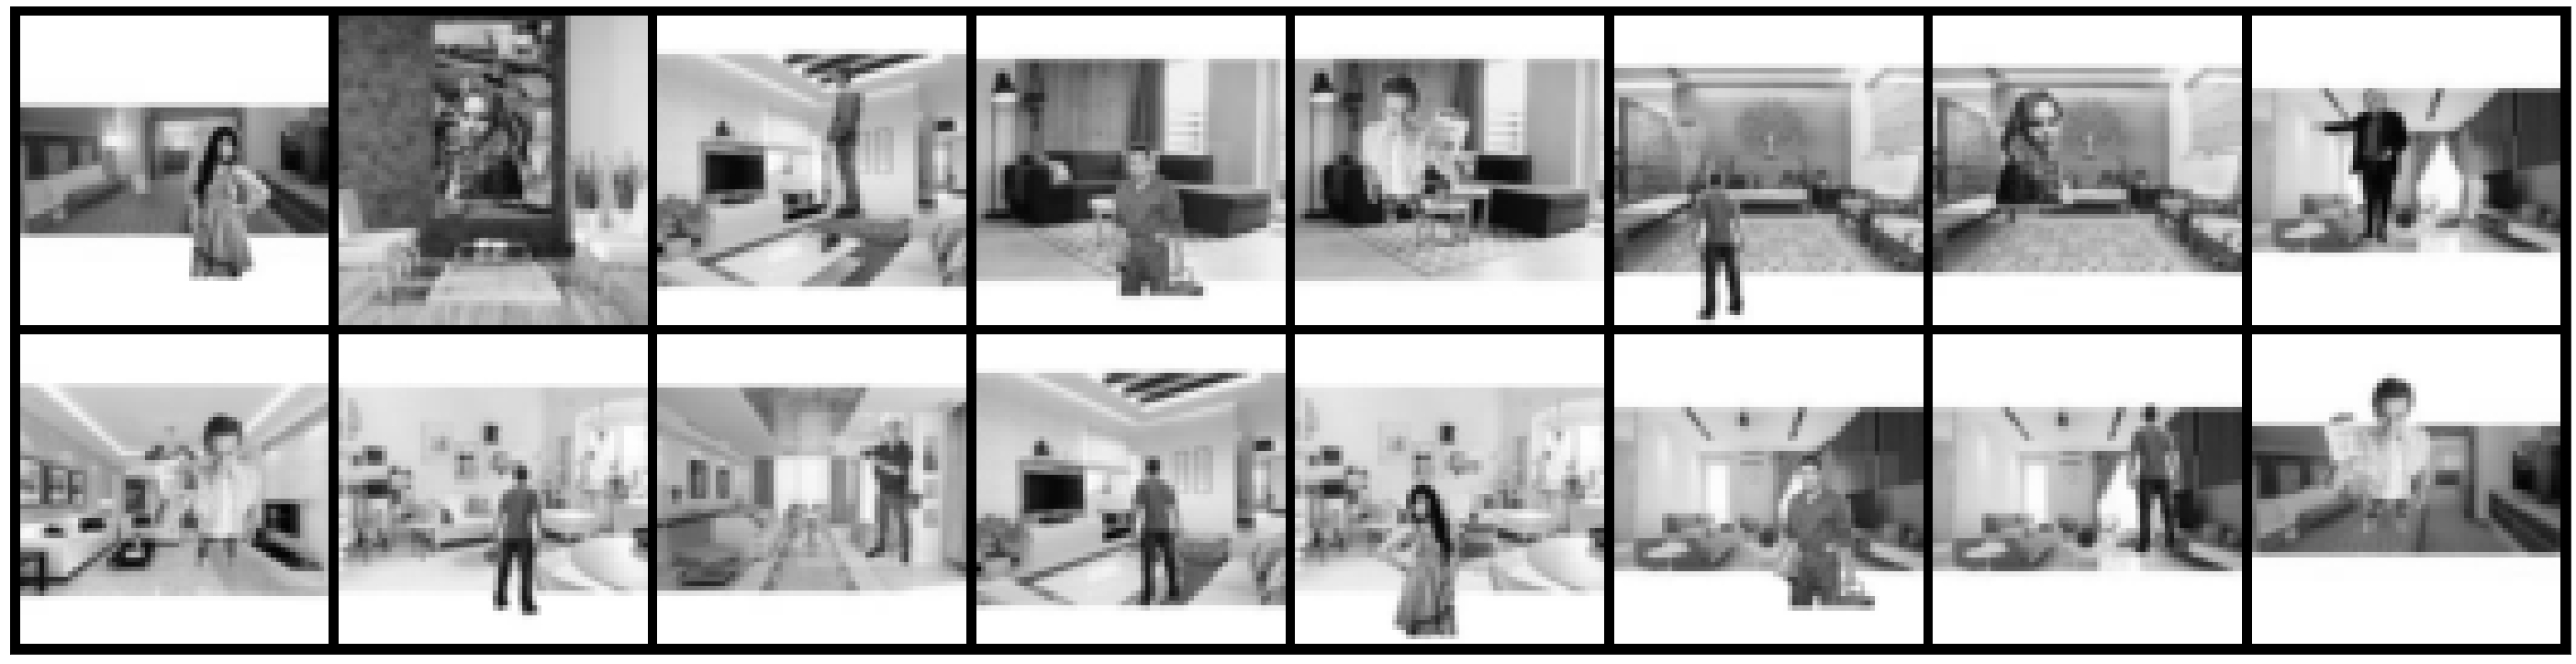

l1=0.2029 l2=0.6402:  20%|██        | 51/250 [01:48<06:48,  2.05s/it]

Train Epoch : 2 [200/4000 (20%)]	Loss: 1.045943


l1=0.2073 l2=0.6595:  40%|████      | 101/250 [03:31<05:04,  2.05s/it]

Train Epoch : 2 [400/4000 (40%)]	Loss: 1.074165


l1=0.1957 l2=0.6559:  60%|██████    | 151/250 [05:14<03:22,  2.04s/it]

Train Epoch : 2 [600/4000 (60%)]	Loss: 1.047209


l1=0.1916 l2=0.6495:  80%|████████  | 201/250 [06:55<01:38,  2.02s/it]

Train Epoch : 2 [800/4000 (80%)]	Loss: 1.032782


l1=0.2014 l2=0.651: 100%|██████████| 250/250 [08:36<00:00,  2.07s/it]


In [0]:
for epoch in range(1,3):
  train(model, criterion,device, train_dl, optim, epoch)
  scheduler.step()


In [0]:
print(sum(p.numel() for p in model.parameters() if p.requires_grad))

8956230


## Show the Output

  0%|          | 0/1000 [00:00<?, ?it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


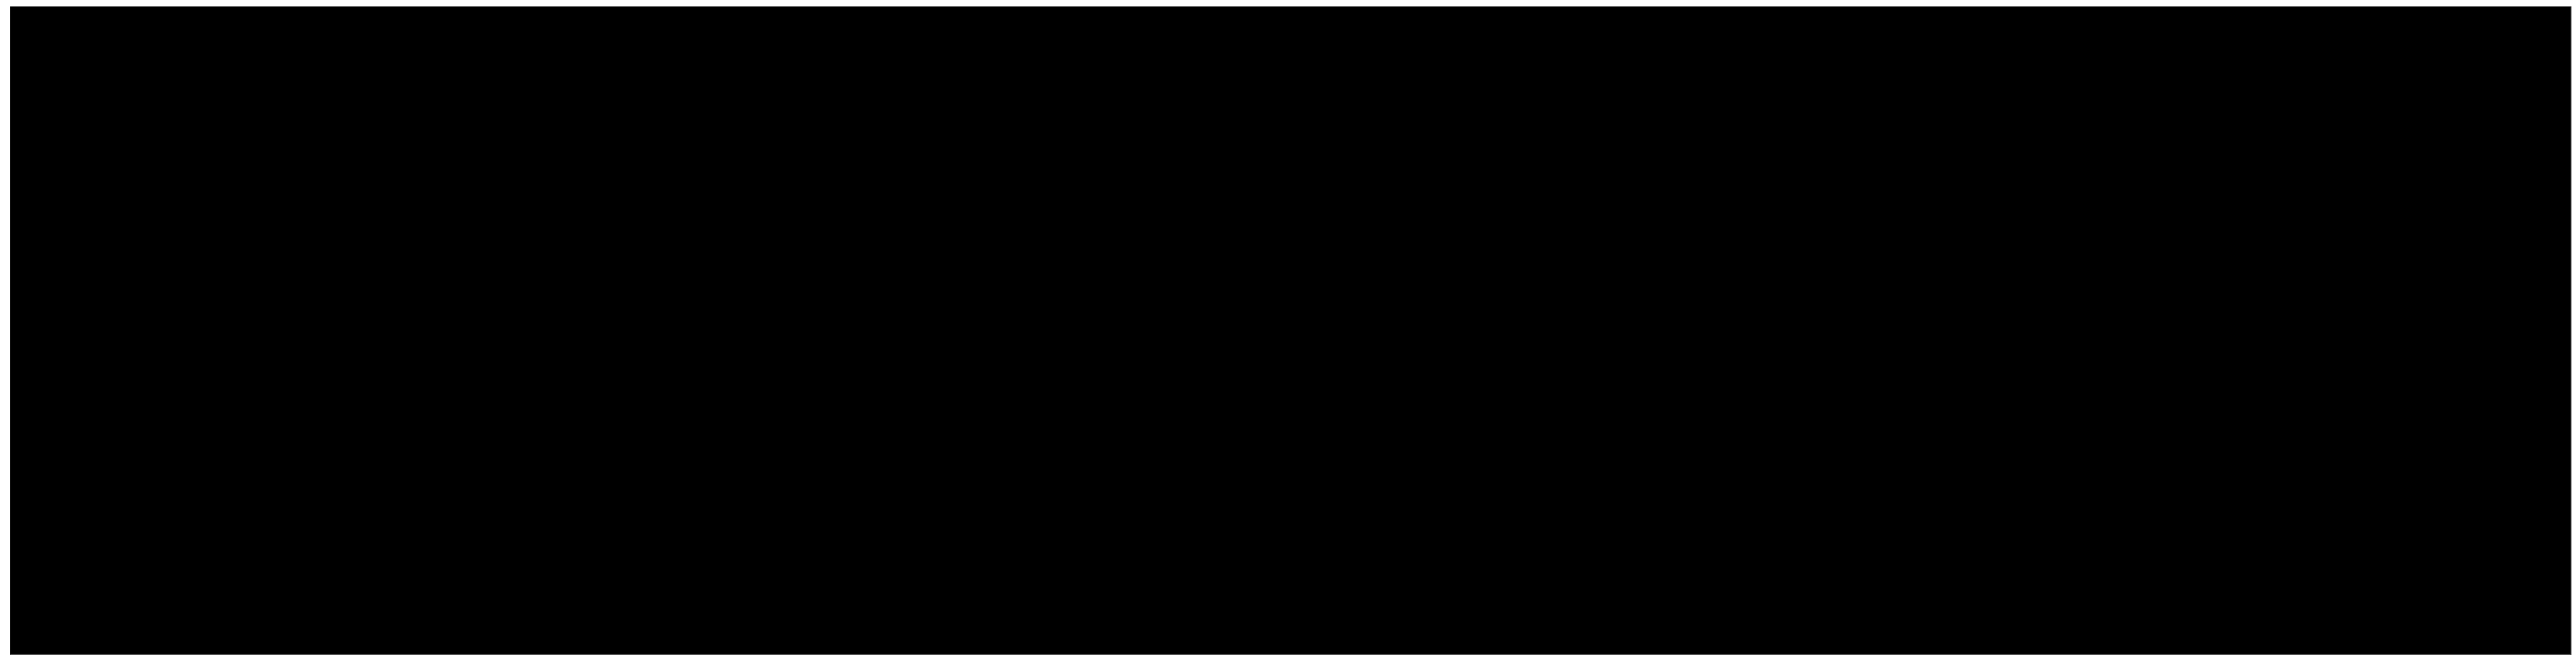

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


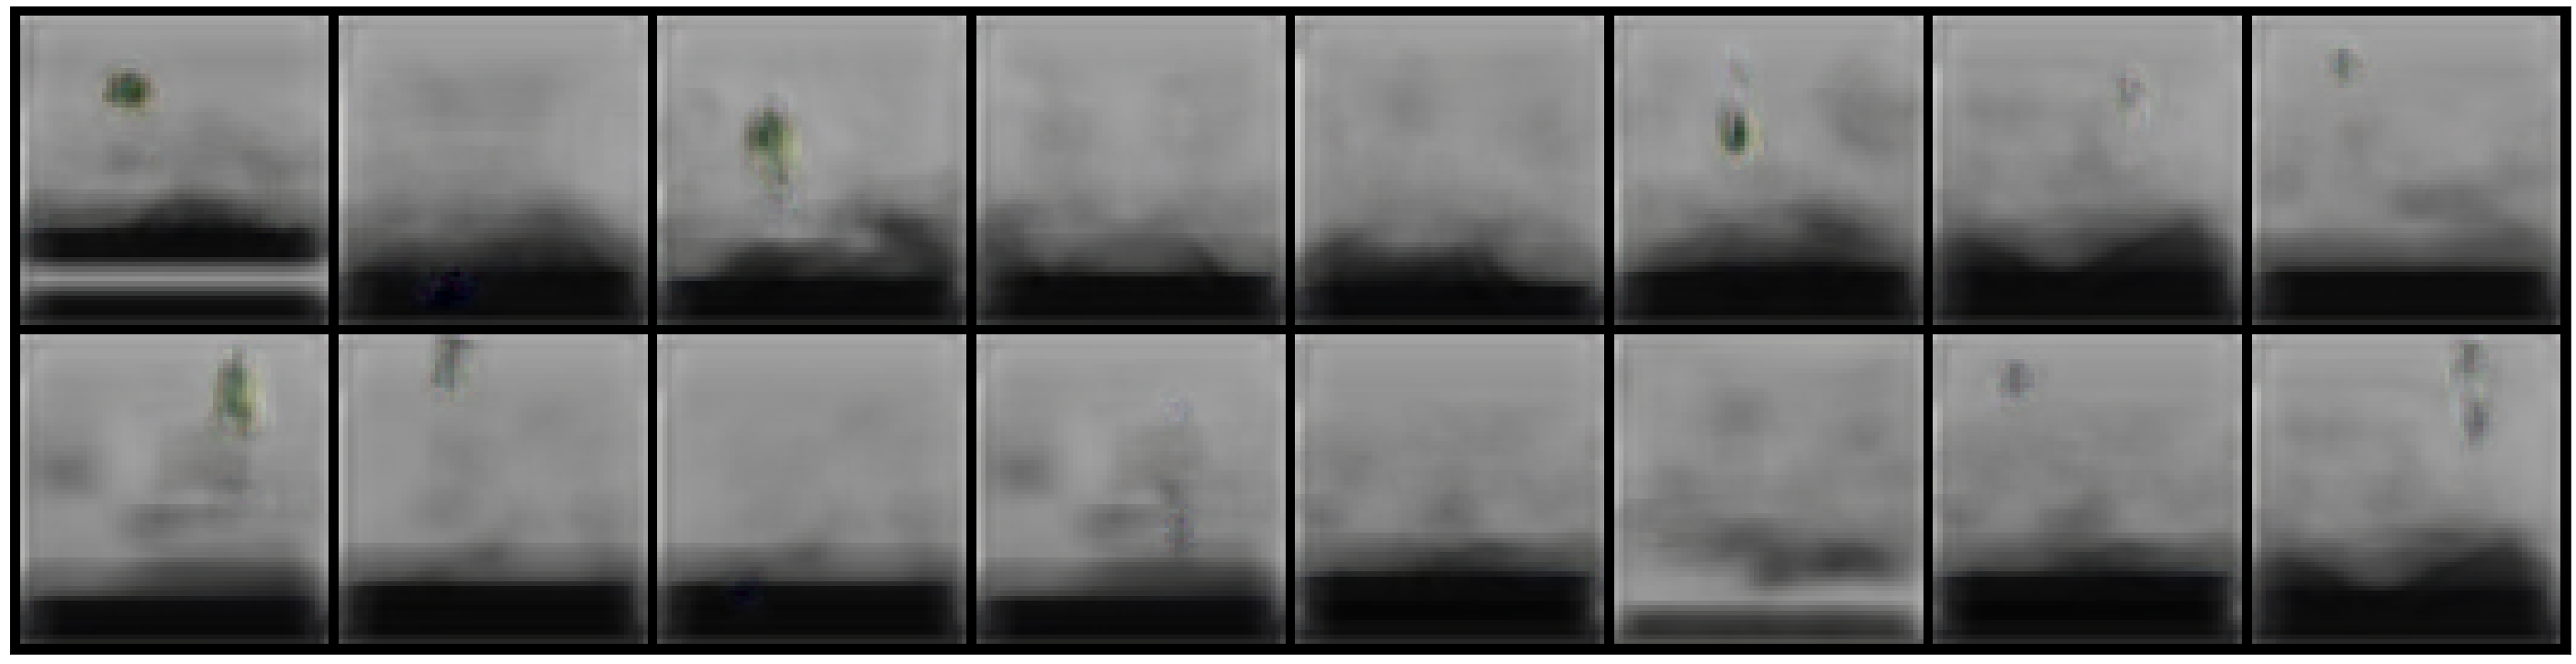

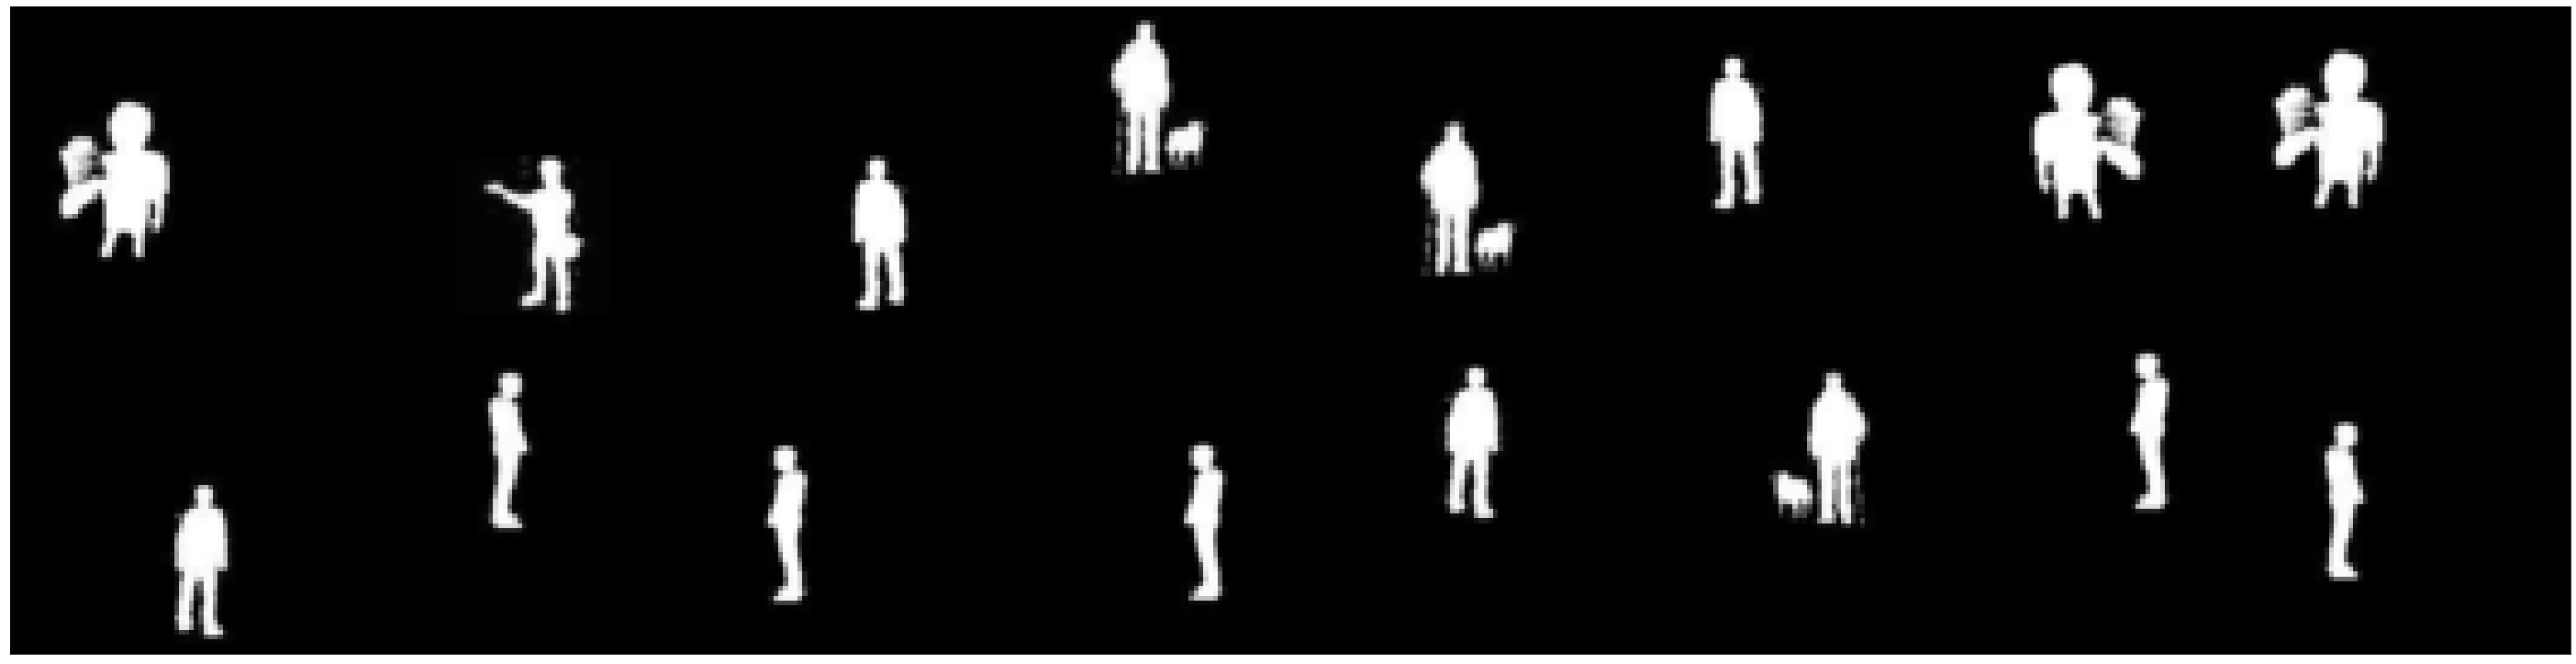

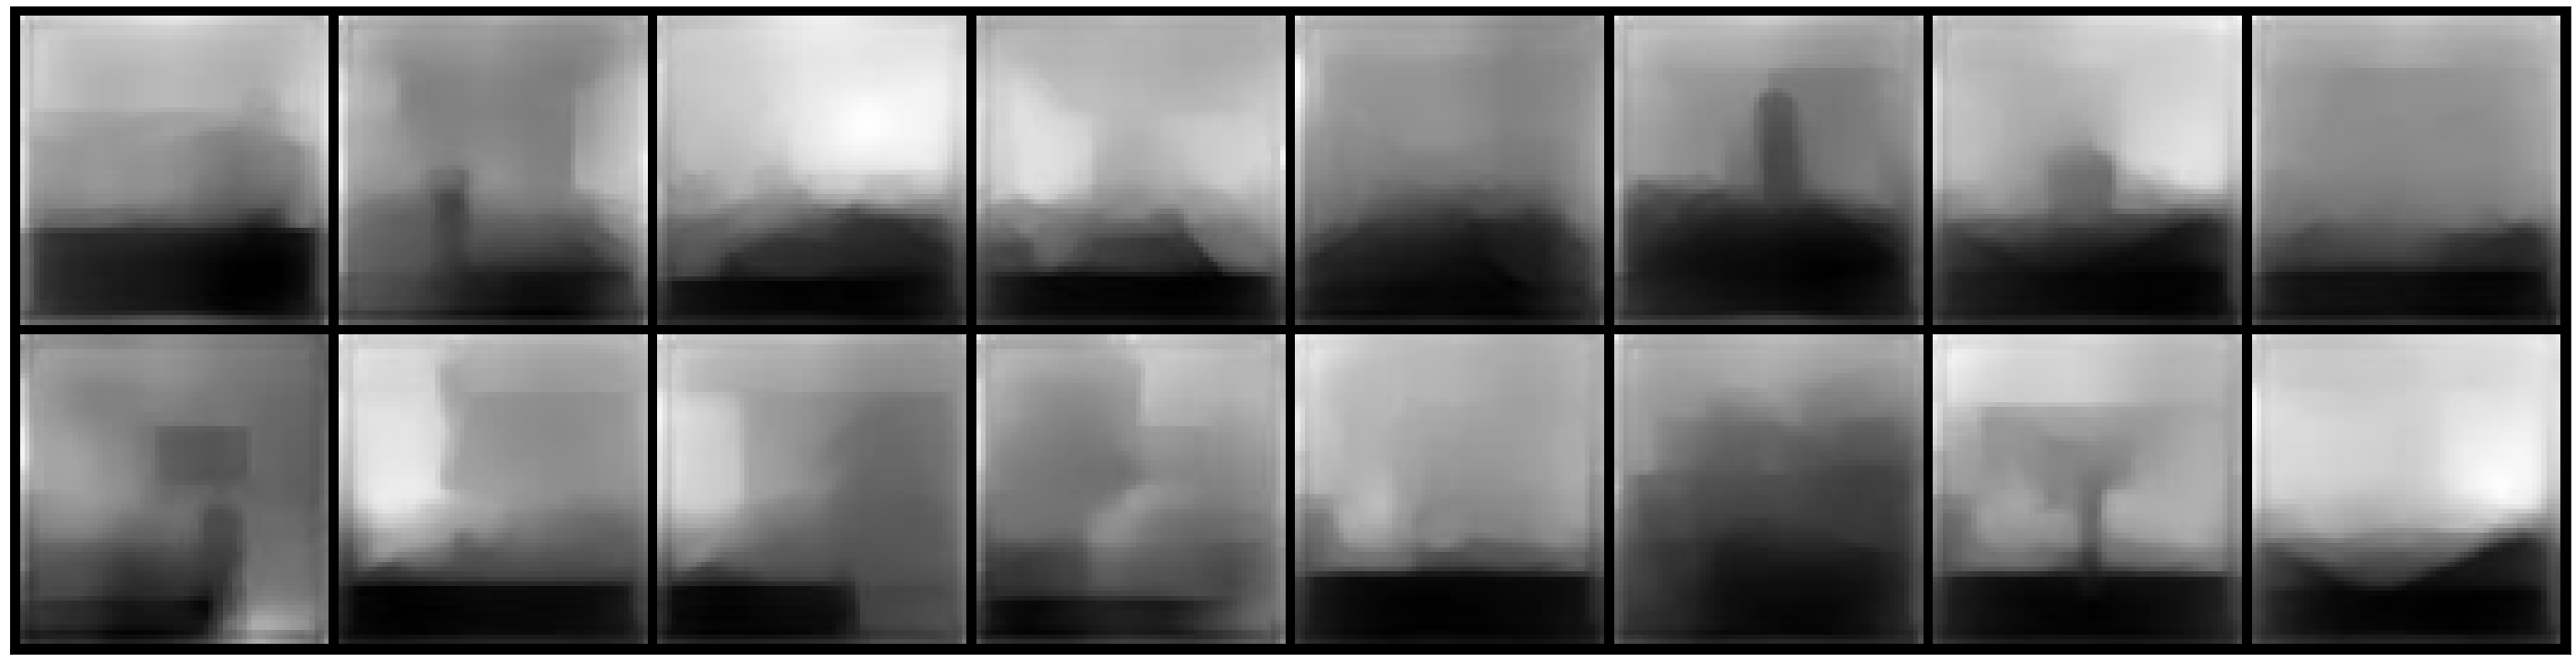

  5%|▌         | 54/1000 [09:49<2:45:37, 10.50s/it]

KeyboardInterrupt: ignored

In [0]:
PATH= Path('./gdrive/My Drive/MASK1/S15/saved_models/latest')
model_test = Net()
#model.load_state_dict()
model_test.load_state_dict(torch.load('./gdrive/My Drive/MASK1/S15/saved_models/latest/myrun.pth'))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_test= model_test.to(device)

pbar = tqdm(train_dl)
for batch_idx, data in enumerate(pbar):
  data["bg_image"] = data["bg_image"].to(device)
  data["fg_bg_image"] = data["fg_bg_image"].to(device)
  data["ms_bg_image"] = data["ms_bg_image"].to(device)
  data["dp_image"] = data["dp_image"].to(device)
  optim.zero_grad()
  output=model_test(data)
  if batch_idx % 5000 == 0:
    saveimage(output[0], "out1.jpg")
    saveimage(output[1], "out2.jpg")
    saveimage(data["ms_bg_image"], "mask.jpg")
    saveimage(data["dp_image"], "db_image.jpg")


print(output[0])    

In [0]:
print(output[1]) 

tensor([[[[0.3557, 0.0000, 0.6523,  ..., 0.6697, 0.8819, 0.6974],
          [1.0307, 0.3656, 0.4027,  ..., 0.4354, 0.5608, 0.5652],
          [0.7062, 0.5040, 0.2519,  ..., 0.3876, 0.5371, 0.7309],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.6500, 0.3665, 0.8647,  ..., 0.7719, 0.8359, 0.7062],
          [0.7854, 0.5217, 0.3015,  ..., 0.6868, 0.8813, 0.8178],
          [0.5397, 0.3953, 0.2494,  ..., 0.7646, 0.7561, 0.8889],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.7614, 0.6057, 0.5919,  ..., 0.8366, 0.9060, 0.9129],
          [1.0318, 0.3804, 0.0000,  ..., 0.7564, 0.6646, 0.6377],
          [0.6923, 0.4719, 0.1615,  ..., 0

In [0]:
print(data["ms_bg_image"][0][0][0])
#loss1 = criterion(output[0],data["ms_bg_image"])

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
